In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import random


#### Loading the data set

In [497]:
#data importing and reading of the data
df_app=pd.read_csv("application_data.csv")
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  FLAG_DOCUMENT_10  \
0                    0.018801       -9461  ...                 0   
1                    0.003541      -16765  ...                 0   
2                    0.010032      -19046  ...                 0   
3                    0.008019      -19005  ...                 0   
4                    0.028663      -19932  ...                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                0                 0   
1                 0                0                 0   
2                 0                0                 0   
3                 0                0                 0   
4                 0                0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                

#### schema check

In [498]:
#printing the shape of the data
print(df_app.shape)

(307511, 122)


In [499]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Null Value check:

In [500]:
# Null function to find the number of null values  
def null_calculation(df):
    out=round(df.isnull().sum()/len(df.index)*100,2)
    return out

In [501]:
Null_col=null_calculation(df_app)
Null_col.head()


SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
dtype: float64

In [502]:
#Columns with values greater than 0
Null_col=Null_col[Null_col>0]
print(Null_col)
print(Null_col.head(20))

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
Length: 64, dtype: float64
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
OWN_CAR_AGE                    65.99
OCCUPATION_TYPE                31.35
EXT_SOURCE_1                   56.38
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
APARTMENTS_AVG                 50.75
BASEMENTAREA_AVG               58.52
YEARS_BEGINEXPLUATATION_AVG    48.78
YEARS_BUILD_AVG                66.50
COMMONAREA_AVG                 69.87
ELEVATORS_AVG                  53.30
ENTRANCES_AVG                  50.35
FLOORSMAX_AVG                  49.76
FLOORSMIN_AVG         

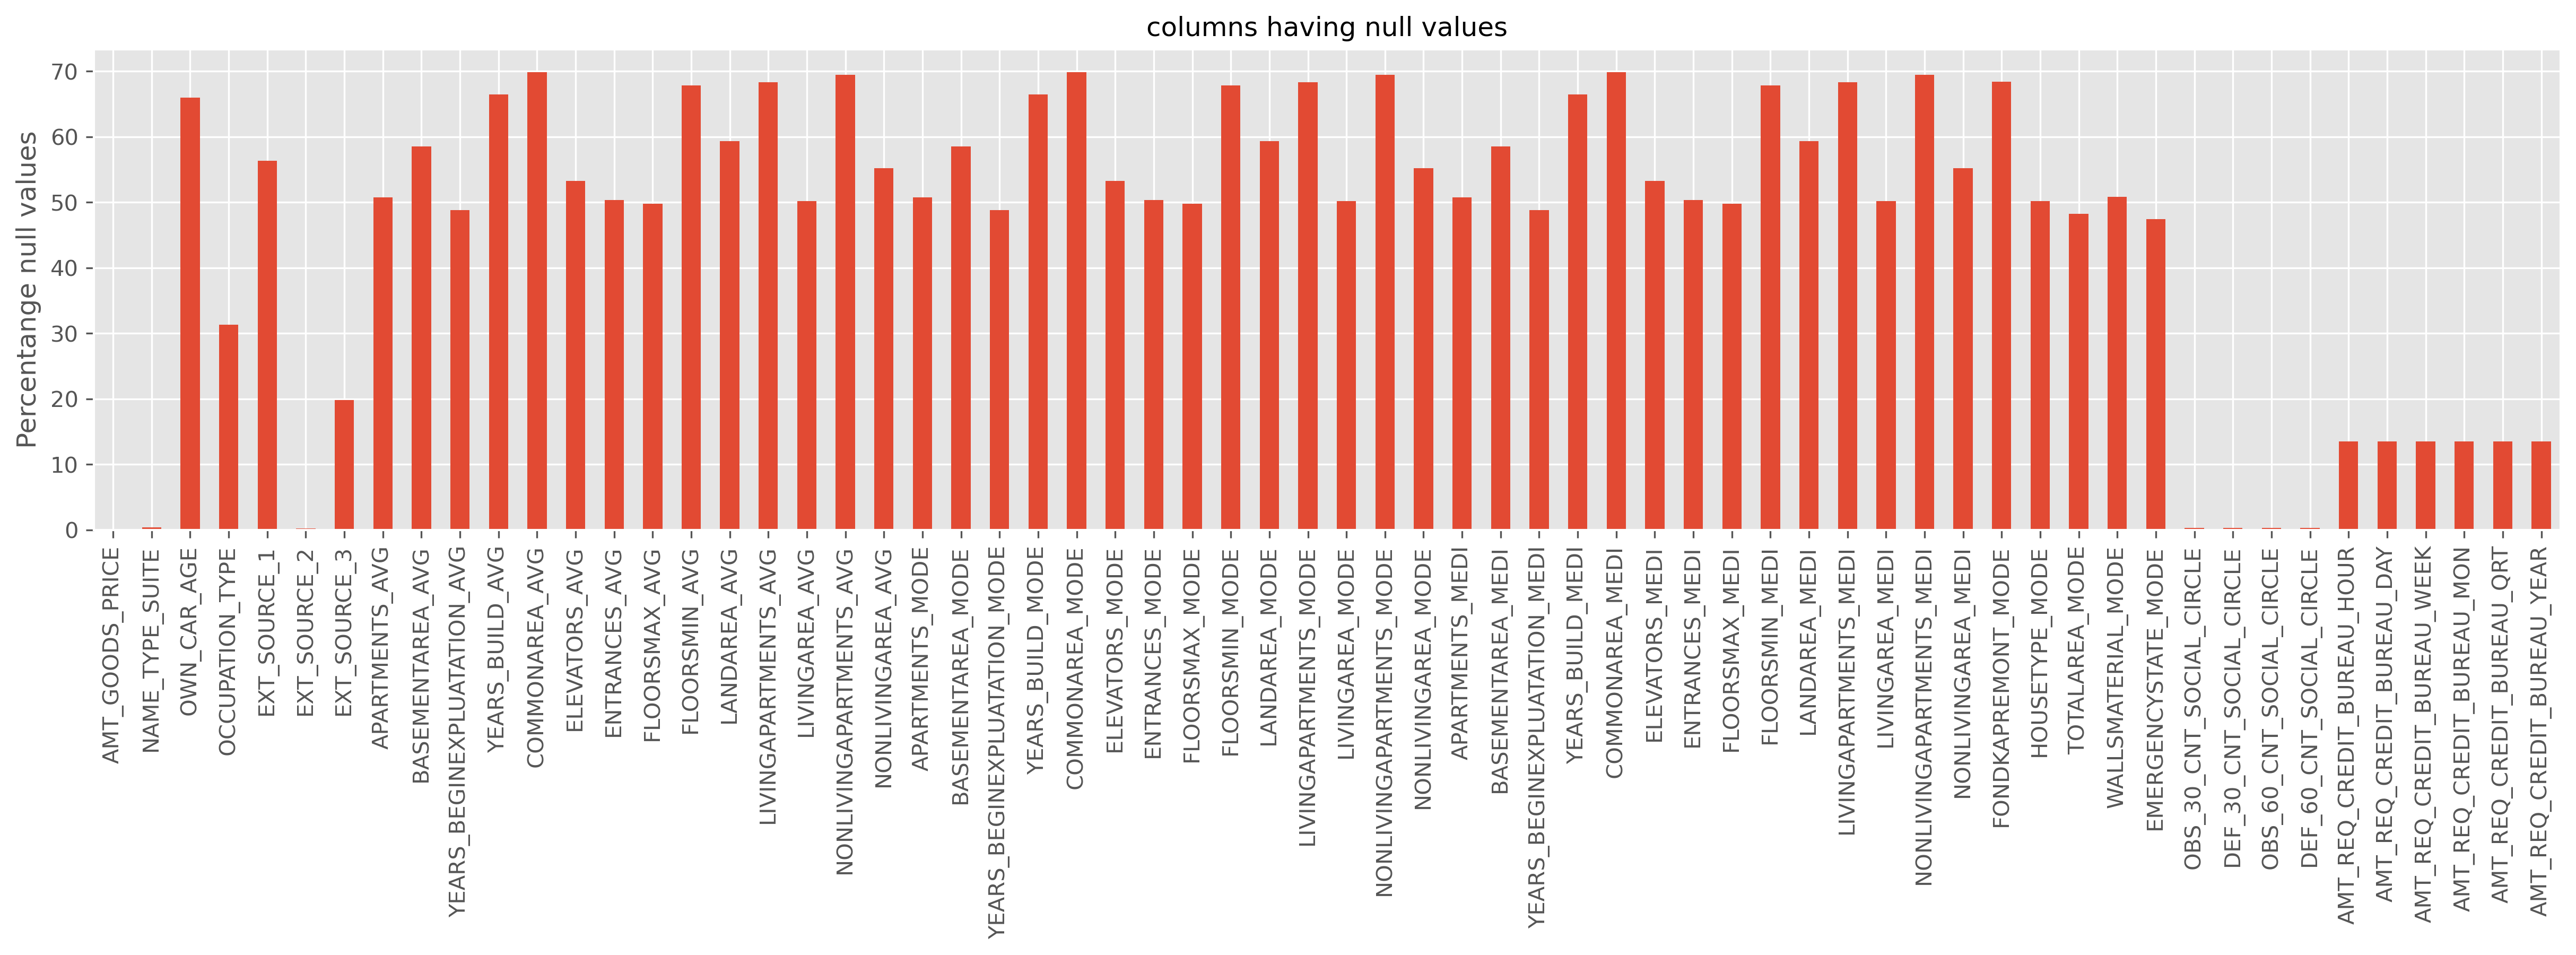

In [503]:
plt.figure(figsize=(20,4),dpi=300)
Null_col.plot(kind='bar')
plt.title('columns having null values')
plt.ylabel('Percentange null values')
plt.show()

In [504]:
#Getting the values in the columns having the null values more than 50%
Null_col_50=Null_col[Null_col>50]
print(Null_col_50)

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [505]:
#Droppin all the columns having DataFrames missing more than 50%
df_app=df_app.drop(Null_col_50.index,axis=1)
df_app.shape

(307511, 81)

In [506]:
#Filtering the columns which have value null values less than 13%
Null_col_10=Null_col[Null_col<13]
print(Null_col_10)

AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64


In [507]:
#Finding the count value for columns with values less than 10%
df_app[Null_col_10.index].count().sort_values(ascending=False)

AMT_GOODS_PRICE             307233
EXT_SOURCE_2                306851
DEF_60_CNT_SOCIAL_CIRCLE    306490
OBS_60_CNT_SOCIAL_CIRCLE    306490
DEF_30_CNT_SOCIAL_CIRCLE    306490
OBS_30_CNT_SOCIAL_CIRCLE    306490
NAME_TYPE_SUITE             306219
dtype: int64

#### Checking the XNA values in the dataset

The gender appearing to be more prominent is female  , XNA values are 4 which is 0.001%

In [508]:
print("CODE_GENDER:",df_app["CODE_GENDER"].unique())
print("maximum times appearing gender :",df_app["CODE_GENDER"].describe().top)

CODE_GENDER: ['M' 'F' 'XNA']
maximum times appearing gender : F


In [509]:
df_app[df_app["CODE_GENDER"]=="XNA"].shape

(4, 81)

The organization type has XNA for the pensioner category and should not be dropped. XNA values are 0.001%

In [510]:
#print("ORGANIZATION_TYPE :",df_app["ORGANIZATION_TYPE"].unique())
print("maximum times appearing entry:", df_app["ORGANIZATION_TYPE"].describe().top)

maximum times appearing entry: Business Entity Type 3


In [511]:
df_app[df_app["ORGANIZATION_TYPE"]=="XNA"].shape

(55374, 81)

#### Creating new dataframes based on the target variable and checking the data imbalance

In [512]:
#target1=client who has payment difficulties and target=0 are all the others 
df_targ0=df_app.loc[df_app["TARGET"]==0]
df_targ1=df_app.loc[df_app["TARGET"]==1]

In [513]:
defaulter_percent=round(100*len(df_targ1)/(len(df_targ0)+len(df_targ1)),2)
nondefaulter_percent=round(100*len(df_targ0)/(len(df_targ0)+len(df_targ1)),2)
print("count of df_target0:",len(df_targ0))
print("count of df_target1:",len(df_targ1))
print("percentage of people who not paid their loan :",nondefaulter_percent,"%")
print("percentage of people who paid their loan :",defaulter_percent,"%")


count of df_target0: 282686
count of df_target1: 24825
percentage of people who not paid their loan : 91.93 %
percentage of people who paid their loan : 8.07 %


In [514]:
imbalance_ratio=round(len(df_targ0)/len(df_targ1),2)
print("imbalance ratio is given by:",imbalance_ratio)

imbalance ratio is given by: 11.39


#### Handling data type conversions 

In [515]:
numeric_columns=["TARGET","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","DAYS_BIRTH"
                ,"DAYS_EMPLOYED","REGION_POPULATION_RELATIVE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START"
                ,"LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY",
                "DAYS_LAST_PHONE_CHANGE"]
df_app[numeric_columns]=df_app[numeric_columns].apply(pd.to_numeric)
df_app.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  FLAG_DOCUMENT_10  \
0                    0.018801       -9461  ...                 0   
1                    0.003541      -16765  ...                 0   
2                    0.010032      -19046  ...                 0   
3                    0.008019      -19005  ...                 0   
4                    0.028663      -19932  ...                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                0                 0                 0   
1                0                 0                 0   
2                0                 0                 0   
3                0                 0                 0   
4                0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         NaN                       NaN   
4                         0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                 

In [516]:
df_app.isnull().sum()
df_app[df_app['CNT_FAM_MEMBERS'].isnull()]
df_app=df_app[~(df_app['CNT_FAM_MEMBERS'].isnull())]

In [517]:
df_app.CNT_FAM_MEMBERS = df_app.CNT_FAM_MEMBERS.astype('int')
df_app.CNT_FAM_MEMBERS

0         1
1         2
2         1
3         2
4         1
         ..
307506    1
307507    1
307508    1
307509    2
307510    2
Name: CNT_FAM_MEMBERS, Length: 307509, dtype: int32

In [518]:
df_app["CNT_CHILDREN"].dtype

dtype('int64')

In [519]:
df_app['AMT_INCOME_TOTAL'].dtype

dtype('float64')

In [520]:
df_app["AMT_ANNUITY"].dtype

dtype('float64')

In [521]:
df_app.CNT_FAM_MEMBERS=df_app.CNT_FAM_MEMBERS.astype('int')
df_app.CNT_FAM_MEMBERS.dtype

dtype('int32')

In [522]:
df_app.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

#### Standardizing columns as more interpretable values and creating new columns

In [523]:
df_app.iloc[:,17:21]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0            -9461           -637            -3648.0            -2120
1           -16765          -1188            -1186.0             -291
2           -19046           -225            -4260.0            -2531
3           -19005          -3039            -9833.0            -2437
4           -19932          -3038            -4311.0            -3458
...            ...            ...                ...              ...
307506       -9327           -236            -8456.0            -1982
307507      -20775         365243            -4388.0            -4090
307508      -14966          -7921            -6737.0            -5150
307509      -11961          -4786            -2562.0             -931
307510      -16856          -1262            -5128.0             -410

[307509 rows x 4 columns]

In [524]:
#Converting to positive values
df_app.iloc[:,17:21].fillna(0,inplace=True)
df_app.iloc[:,17:21]=df_app.iloc[:,17:21].apply(lambda x:abs(x))

In [525]:
df_app['DAYS_BIRTH']=df_app['DAYS_BIRTH'].apply(lambda x:int(x/365))
df_app['DAYS_EMPLOYED']=df_app['DAYS_EMPLOYED'].apply(lambda x:int(x/365))
df_app['DAYS_REGISTRATION']=df_app['DAYS_REGISTRATION'].apply(lambda x:int(x/365))
df_app['DAYS_ID_PUBLISH']=df_app['DAYS_ID_PUBLISH'].apply(lambda x:int(x/365))

In [526]:
df_app['DAYS_LAST_PHONE_CHANGE']=df_app['DAYS_LAST_PHONE_CHANGE'].apply(lambda x:abs(x))
df_app['DAYS_LAST_PHONE_CHANGE'].fillna(0,inplace=True)
df_app['DAYS_LAST_PHONE_CHANGE']=df_app['DAYS_LAST_PHONE_CHANGE'].apply(lambda x:int(x)/365)

#### Converting target varaible to 1's and 0's

In [527]:
df_app.FLAG_OWN_CAR.replace(to_replace=['N', 'Y'], value=[0, 1],inplace=True)
df_app.FLAG_OWN_REALTY.replace(to_replace=['N', 'Y'], value=[0, 1],inplace=True)

#### Using FLAG_OWN_CAR and FLAG_OWN_REALTY to create a new column as the Fin_Car_Realty 

In [528]:
def fin(a,b):
    if(a==1) and (b==1):
        return 'Rich'
    elif(a==0) and (b==0):
        return 'Not Rich'
    else:
        return 'Moderately Rich'
    

In [529]:
df_app['Fin_Car_Realty']=df_app.apply(lambda row:fin(row['FLAG_OWN_CAR'],row['FLAG_OWN_REALTY']),axis=1)

In [530]:
df_app[['FLAG_OWN_CAR','FLAG_OWN_REALTY','Fin_Car_Realty']]

FLAG_OWN_CAR  FLAG_OWN_REALTY   Fin_Car_Realty
0                  0                1  Moderately Rich
1                  0                0         Not Rich
2                  1                1             Rich
3                  0                1  Moderately Rich
4                  0                1  Moderately Rich
...              ...              ...              ...
307506             0                0         Not Rich
307507             0                1  Moderately Rich
307508             0                1  Moderately Rich
307509             0                1  Moderately Rich
307510             0                0         Not Rich

[307509 rows x 3 columns]

#### Dropping columns that are less related to our analysis

In [531]:
#Removing the unwanted column from the application dataset for the better analysis
unwanted_columns=['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [532]:
df_app.drop(labels=unwanted_columns,axis=1,inplace=True)

In [533]:
print(df_app.shape)

(307509, 35)


#### Outlier Analysis : Plotting Box plots for a continuous variables to see outliers .

##### EXT_SOURCE - External Source income 

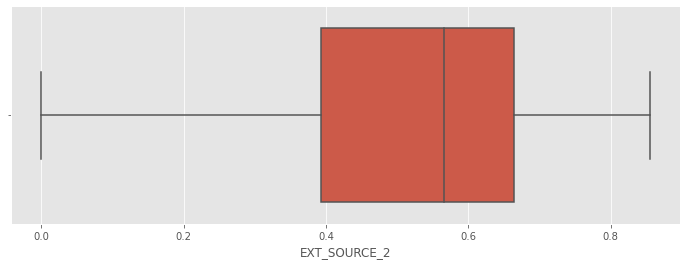

In [534]:
#Box plot - Observation of no outliers from the plot - Data looks as it if it is right skewed- missing values may be imputed by the median .
plt.figure(figsize=(12,4))
sns.boxplot(df_app['EXT_SOURCE_2'])
plt.show()

In [535]:
df_app['EXT_SOURCE_2'].mean()

0.5143916410476034

In [536]:
df_app['EXT_SOURCE_2'].median()

0.5659614260608526

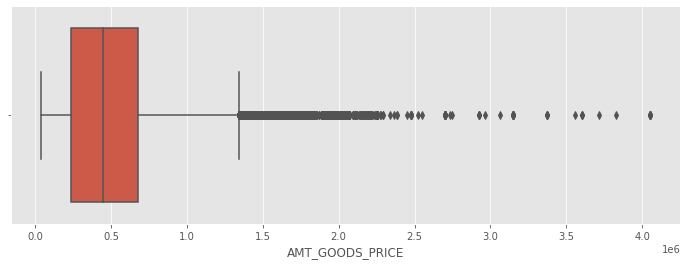

In [537]:
#Boxplot for the continuous variable - we can observe significant number of outliers from the plot . The missing values can be replaced by the median 450000
plt.figure(figsize=(12,4))
sns.boxplot(df_app['AMT_GOODS_PRICE'])
plt.show()


In [538]:
df_app['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [539]:
df_app['AMT_GOODS_PRICE'].median()

450000.0

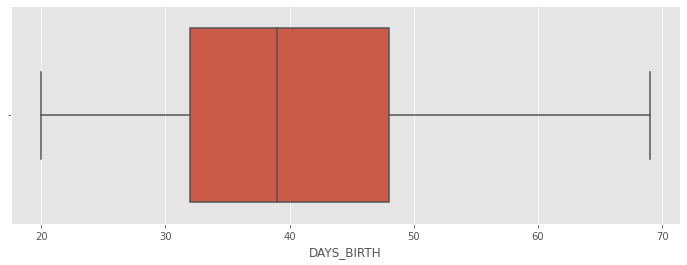

In [662]:
plt.figure(figsize=(12,4))
sns.boxplot(df_app['DAYS_BIRTH'])
plt.show()

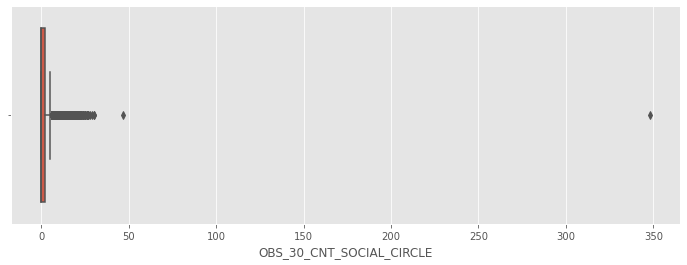

In [541]:
#We observe too many outliers here .
plt.figure(figsize=(12,4))
sns.boxplot(df_app['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()


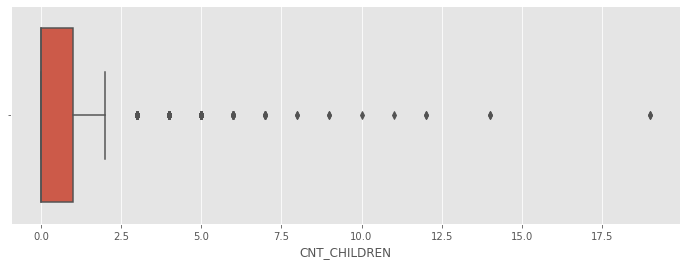

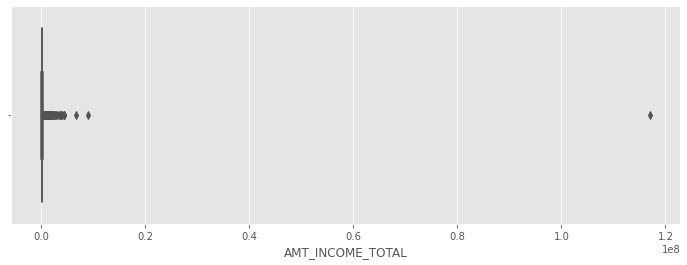

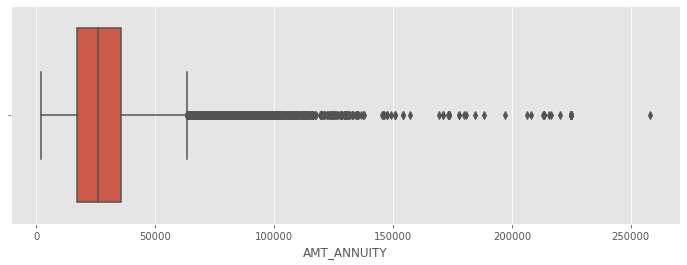

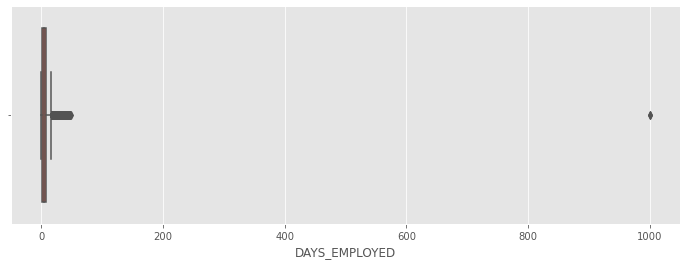

In [658]:
#Box plot for selected columns
plt.figure(figsize=(12,4))
sns.boxplot(df_app['CNT_CHILDREN'])
plt.show()
plt.figure(figsize=(12,4))
sns.boxplot(df_app['AMT_INCOME_TOTAL'])
plt.show()
plt.figure(figsize=(12,4))
sns.boxplot(df_app['AMT_ANNUITY'])
plt.show()
plt.figure(figsize=(12,4))
sns.boxplot(df_app['DAYS_EMPLOYED'])
plt.show()

#### Inference- 
From the above plot and describe analysis we found that -
The first quartile is almost missing for the CNT_CHILDREN that means most of the data are present in the first quartile.
There is single high value data point as outlier presnet in AMT_INCOME_TOTAL and removing of this point will drastically imapct the box plot for further analysis.
The first quartile is slim ,compared to third quartile for AMT_ANNUITY","DAYS_EMPLOYED" ,this mean data are skewed towards first quartile.

## Univariate Analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Job category of person. In our case the income type is clearly an un-ordered Univariate analysis 
- Count of children is also un-ordered univariate analysis as any family can have any number of children .
- Type of loan taken by a person = home, personal, auto etc.

## Bivariate Analysis 

- Use of Box plots to analyse using meadian and quartile ranges for the target variable
- We plot countplots for the target variable where 1- Indicates clients who have payment difficulties an 0-the other clients
- Categorical-Categorical , Categorical_Numerical and Numerical_numerical values can be expressed using this analysis.

#### Unordered Numeric Univariate analysis -Count of Children

1.Analysing the column for CNT_CHILDREN on an average cannot have more than 5-10 children .

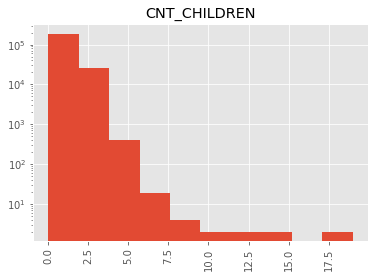

In [665]:
plt.style.use('ggplot')
plt.hist(x="CNT_CHILDREN", data=df_app)
plt.title('CNT_CHILDREN')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [543]:
df_app['CNT_CHILDREN'].value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

#### Multivariate analysis for CNT_CHILDREN

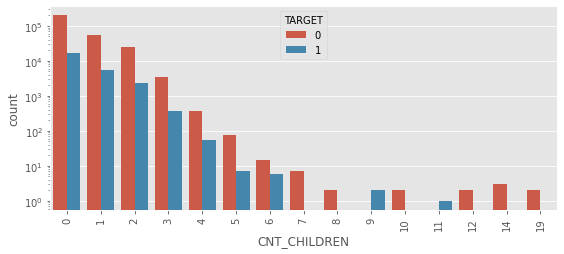

In [545]:
features=["CNT_CHILDREN"]
plt.figure(figsize=(20,15))
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i[1],hue="TARGET",data=df_app)
    plt.xticks(rotation=90)
    plt.yscale('log')

Inference- The number of people who have no children are maximum and there doesn't seem to be a noticebale pattern amongst the defaulters as the cnt_children increases.

### Numerical Univariate Analysis

Univariate Analysis for target 1(people with difficulty paying the loan) -

1. Dealing with analysis of AMT_INCOME_TOTAL and AMT_CERDIT

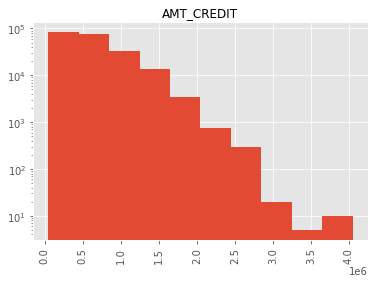

In [666]:
plt.style.use('ggplot')
plt.hist(x="AMT_CREDIT", data=df_app ,bins=10)
plt.rcParams["axes.titlesize"]=12
plt.title("AMT_CREDIT")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

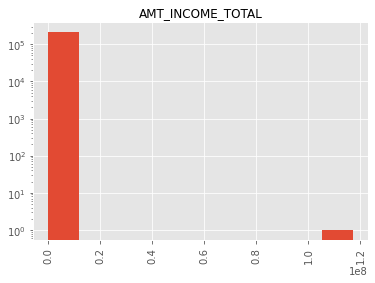

In [667]:
plt.style.use('ggplot')
plt.hist(x="AMT_INCOME_TOTAL", data=df_app ,bins=10)
plt.rcParams["axes.titlesize"]=12
plt.title("AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

Distplot computes the probability density for that rating bucket 

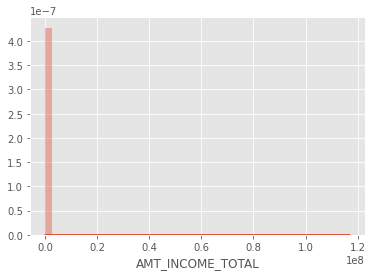

In [548]:
#df_app.AMT_ANNUITY.value_counts(normalize=True)
sns.distplot(df_app.AMT_INCOME_TOTAL)
plt.show()

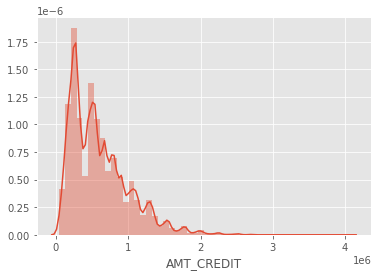

In [549]:
#df_app.AMT_ANNUITY.value_counts(normalize=True)
sns.distplot(df_app.AMT_CREDIT)
plt.show()

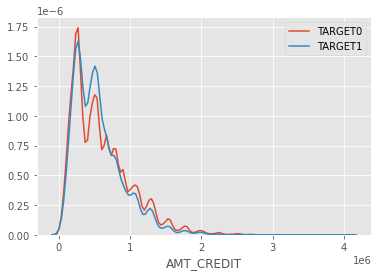

In [550]:
sns.distplot(df_targ0['AMT_CREDIT'],label='TARGET0',hist=False)
sns.distplot(df_targ1['AMT_CREDIT'],label='TARGET1',hist=False)

#### Inference - AMT CREDIT – follows similar trend for both defaulters and non-defaulters.
#### AMT_INCOME_TOTAL doesn't show great deviation either between defaulters and non-defaulters

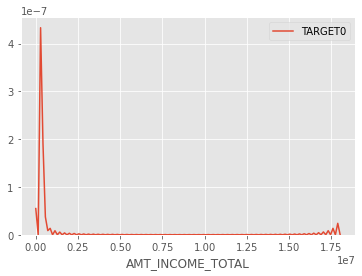

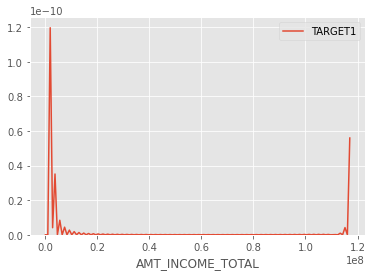

In [685]:
sns.distplot(df_targ0['AMT_INCOME_TOTAL'],label='TARGET0',hist=False)
plt.show()
sns.distplot(df_targ1['AMT_INCOME_TOTAL'],label='TARGET1',hist=False)
plt.show()

#### Numerical Bi-variate Analysis

In [552]:
#bin Creation for AMT_INCOME_TOTAL 
bins=[0,100000,200000,300000,400000,500000,100000000]
slot=["<100000","100000-200000","200000-300000","300000-400000","400000-500000","500000 and above"]
df_app["RANGE_AMT_INCOME"]=pd.cut(df_app["AMT_INCOME_TOTAL"],bins,labels=slot)

In [553]:
#bin Creation for AMT_CERDIT
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,100000000]
slot=["<100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-600000","600000-700000","700000-800000","850000-900000","900000 and above"]
df_app["RANGE_AMT_CREDIT"]=pd.cut(df_app["AMT_CREDIT"],bins,labels=slot)

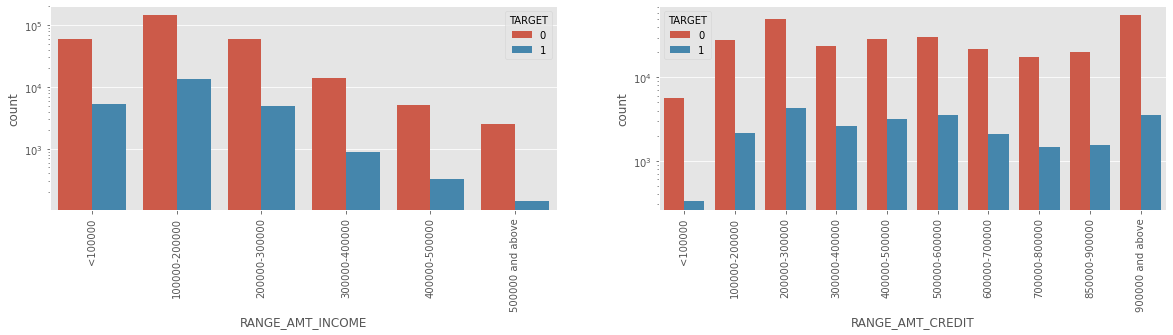

In [554]:
#Plot of string vs int -Countplot for both target 0 and target 1 
features=["RANGE_AMT_INCOME","RANGE_AMT_CREDIT"]
plt.figure(figsize=(20,15))
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i[1],hue="TARGET",data=df_app)
    plt.xticks(rotation=90)
    plt.yscale('log')

#### Inference -  100000-200000 range of income is the highest range of income  and 500000 and above is the lowest

#### Inference -   200000-300000 range of amount credit and 900000 and above are the highest .

#### Numerical Univariate Analysis for AMT_ANNUITY

2. Histogram Analysis for "AMT_ANNUITY" -Loan annuity- An annuity loan is a situation in which an annuity holder will borrow money against the value of his/her annuity contract

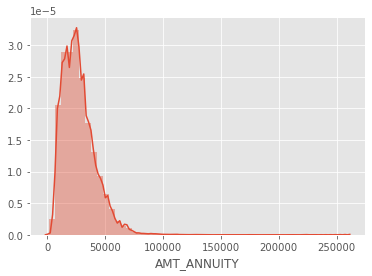

In [555]:
df_app.AMT_ANNUITY.value_counts(normalize=True)
sns.distplot(df_app.AMT_ANNUITY)
plt.show()

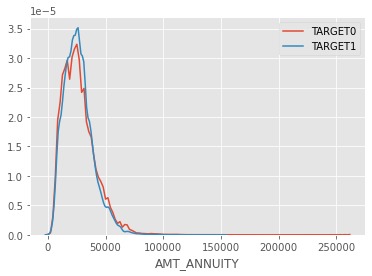

In [556]:
sns.distplot(df_targ0['AMT_ANNUITY'],label='TARGET0',hist=False)
sns.distplot(df_targ1['AMT_ANNUITY'],label='TARGET1',hist=False)

#### Inference 
-Loan annuity which is like the installment payments or emis . Here the defaulter has slight deviation but not quite conclusive to depend on this feature.

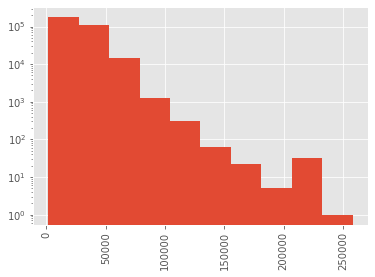

In [557]:
plt.style.use('ggplot')
plt.hist(x="AMT_ANNUITY", data=df_app)
plt.rcParams["axes.titlesize"]=12
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### Bi-Variate Analysis for AMT_ANNUITY

In [558]:
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
slot=["<100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-600000","600000-700000","700000-800000","850000-900000","900000 and above"]
df_app["AMT_ANNUITY_R"]=pd.cut(df_app["AMT_ANNUITY"],bins,labels=slot)

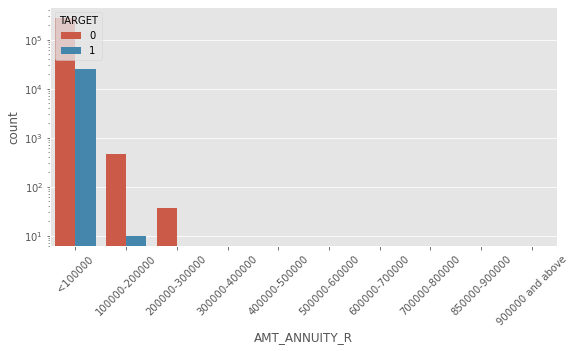

In [559]:
values=["AMT_ANNUITY_R"]
plt.figure(figsize=(20,15))
for i in enumerate(values):
    plt.subplot(3,2,i[0]+1)
    plt.xticks(rotation=45)
    plt.yscale('log')
    sns.countplot(x=i[1],hue="TARGET",data=df_app)

3. Histogram Analysis for AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

#### Numerical Bivariate Analysis

In [560]:
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
slot=["<100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-600000","600000-700000","700000-800000","850000-900000","900000 and above"]
df_app["AMT_GOODS_PRICE_R"]=pd.cut(df_app["AMT_GOODS_PRICE"],bins,labels=slot)

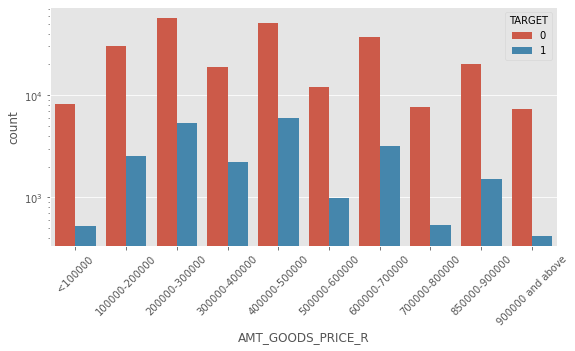

In [561]:
values=["AMT_GOODS_PRICE_R"]
plt.figure(figsize=(20,15))
for i in enumerate(values):
    plt.subplot(3,2,i[0]+1)
    plt.xticks(rotation=45)
    plt.yscale('log')
    sns.countplot(x=i[1],hue="TARGET",data=df_app)

#### Inference-
The goods price is the price of the goods for which the loan is taken on .
The price given is more for 200000-300000 and 400000-500000 ranges is having the highest number of defaulter .

#### Categorical  Unordered  Univariate Analysis 

1.Dealing with analysis of"NAME_INCOME_TYPE","NAME_CONTRACT_TYPE"

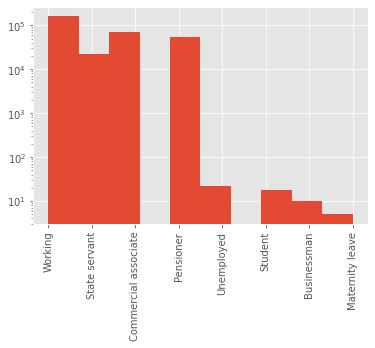

In [562]:
#Histogram and Bar plot - To perform Univariate Analysis
plt.style.use('ggplot')
plt.hist(x="NAME_INCOME_TYPE", data=df_app,bins=10)
plt.rcParams["axes.titlesize"]=12
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [563]:
#calculate the percentage of each income type category. 
df_app.dtypes
df_app.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516323
Commercial associate    0.232887
Pensioner               0.180034
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

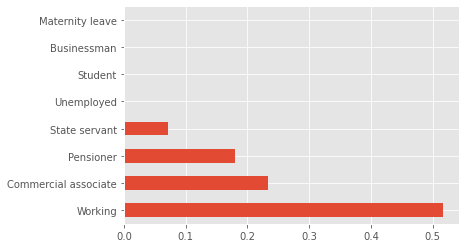

In [564]:
#Plotting bar graph for each income type category. 
df_app.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()

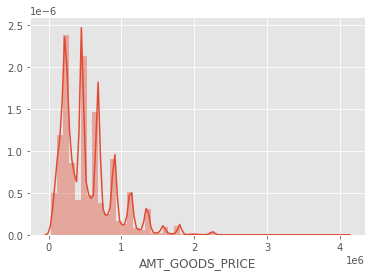

In [565]:
df_app.AMT_GOODS_PRICE.value_counts(normalize=True)
sns.distplot(df_app.AMT_GOODS_PRICE)
plt.show()

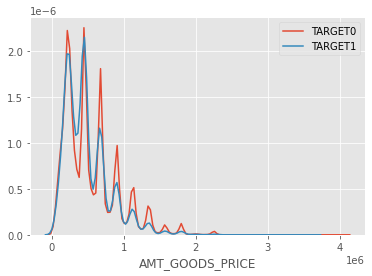

In [668]:
sns.distplot(df_targ0['AMT_GOODS_PRICE'],label='TARGET0',hist=False)
sns.distplot(df_targ1['AMT_GOODS_PRICE'],label='TARGET1',hist=False)

#### Categorical  Ordered  Univariate Analysis 

1. Analysis for each person owns a car or not.

In [567]:
#Calculating the percentage for each person owns a car or not is targeted .
df_app.FLAG_OWN_CAR.value_counts(normalize=True)

0    0.65989
1    0.34011
Name: FLAG_OWN_CAR, dtype: float64

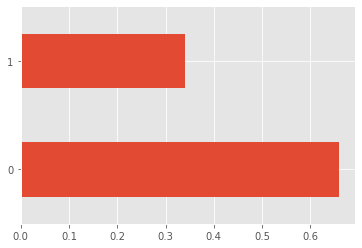

In [568]:
#Plotting bar graph for each person owns a car or not category. 
df_app.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh()

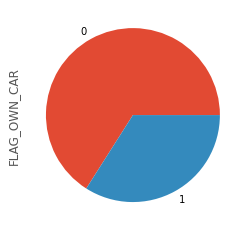

In [569]:
df_app.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie()
plt.show()

Inference - Number of clients who own a car are fewer.

2. Analysis of FLAG_OWN_REALTY -Flag =1 if client owns a house or flat .


In [570]:
#Calculating the percentage for  if client owns a house or flat .
df_app.FLAG_OWN_REALTY.value_counts(normalize=True)

1    0.693671
0    0.306329
Name: FLAG_OWN_REALTY, dtype: float64

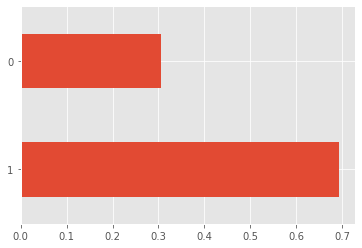

In [571]:
#Plotting bar graph for  if client owns a house or flat .
df_app.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh()

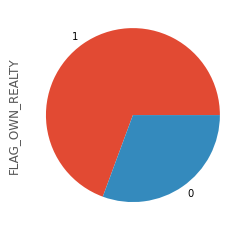

In [572]:
df_app.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie()
plt.show()

Inference - Number of clients who own a house or flat are more.

3. Analysis for each person wanting the loan.

In [573]:
#Calculating the percentage for each gender of person wanting the loan .
df_app.CODE_GENDER.value_counts(normalize=True)

F      0.658345
M      0.341642
XNA    0.000013
Name: CODE_GENDER, dtype: float64

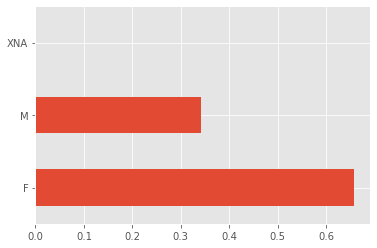

In [574]:
#Plotting bar graph for each CODE_GENDER type category. 
df_app.CODE_GENDER.value_counts(normalize=True).plot.barh()

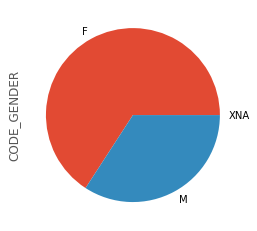

In [575]:
df_app.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.show()

Inference - The number of females wanting a loan seems to be larger ratio from the data .

#### Categorical  Ordered  Bivariate Analysis 

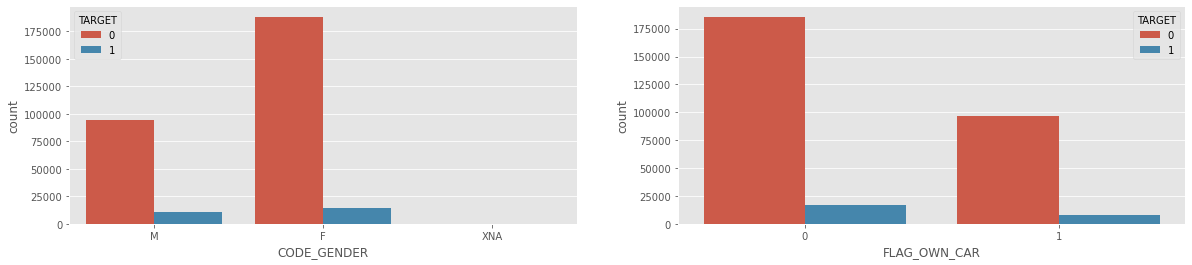

In [576]:
features=["CODE_GENDER","FLAG_OWN_CAR"]
plt.figure(figsize=(20,10))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i[1],hue="TARGET",data=df_app)
    #plt.yscale('log')
   

3. Analysis for type of contract -Identification if loan is cash or revolving

A revolving loan- provides a borrower with a maximum aggregate amount of capital, available over a specified period of time. In this case on analysis we find fewer people having opted for this option .

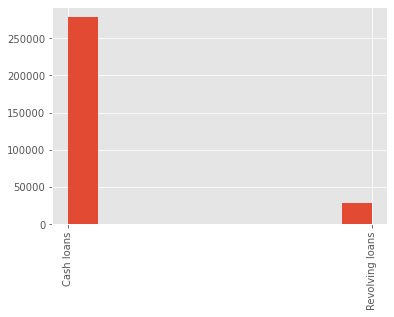

In [577]:
#Histogram
plt.style.use('ggplot')
plt.hist(x="NAME_CONTRACT_TYPE", data=df_app,bins=10)
plt.rcParams["axes.titlesize"]=12
plt.xticks(rotation=90)
plt.show()

In [578]:
#Calculate percentage for each contract type category. 
df_app.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.904793
Revolving loans    0.095207
Name: NAME_CONTRACT_TYPE, dtype: float64

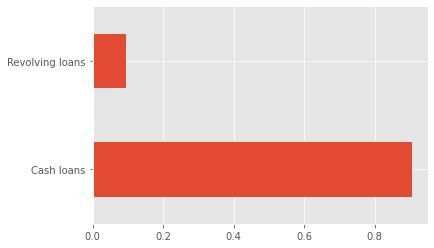

In [579]:
#Plotting bar graph for each contract type category. 
df_app.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()

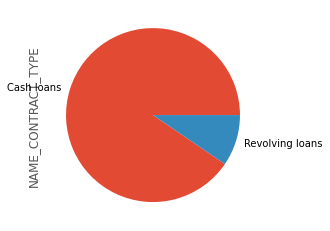

In [580]:
#Plotting pie graph for each contract type category. 
df_app.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

Inference -A revolving loan- provides a borrower with a maximum aggregate amount of capital, available over a specified period of time. In this case on analysis we find fewer people having opted for this option .

#### Categorical  Ordered  Bivariate Analysis 

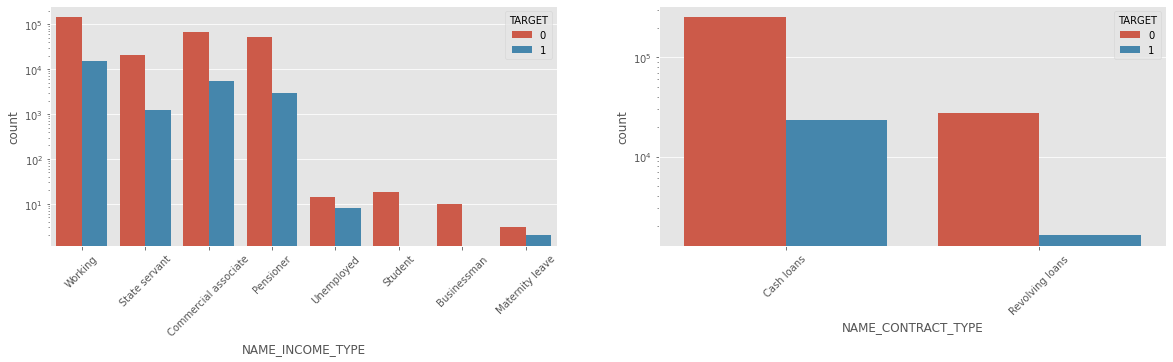

In [581]:
#Plotting with the target variable for better analysis
values=["NAME_INCOME_TYPE","NAME_CONTRACT_TYPE"]
plt.figure(figsize=(20,15))
for i in enumerate(values):
    plt.subplot(3,2,i[0]+1)
    plt.xticks(rotation=45)
    plt.yscale('log')
    sns.countplot(x=i[1],hue="TARGET",data=df_app)

#### Inference -
NAME_INCOME_TYPE:
student ,pensioner and Business have a higher percentage of loan payment.
Maternity category is significantly another problem when it comes to repayment ,
Working , Government and commercial associate are having higher default percentage 


NAME_CONTRACT_TYPE:
For contract type "CASH LOANS" is having a higher number of credits than "REVOLVING LOANS" contract types.

4. Analysis for if the person is rich , moderately rich or very rich

In [582]:
#Calculate percentage for each category type. 
df_app.Fin_Car_Realty.value_counts(normalize=True)

Moderately Rich    0.563161
Rich               0.235310
Not Rich           0.201529
Name: Fin_Car_Realty, dtype: float64

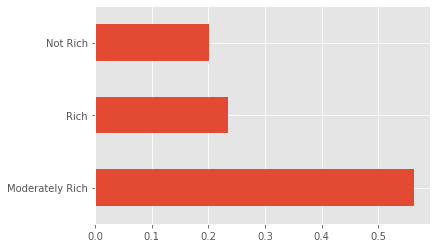

In [583]:
#Plotting bar graph for each contract type category. 
df_app.Fin_Car_Realty.value_counts(normalize=True).plot.barh()
plt.show()

Conclusions made based on the value scale

Flag_own_car:
The person owning car is more likely to be defaulter as he has spent money to buy a car.

Code_Gender:
The percentage of defaulters are more in the Female category when compared to males.



In [584]:
df_app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1         Cash loans           M             0   
1           100003       0         Cash loans           F             0   
2           100004       0    Revolving loans           M             1   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307506      456251       0         Cash loans           M             0   
307507      456252       0         Cash loans           F             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   
307510      456255       0         Cash loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0           24700.5         351000.0               Working   
1           35698.5        1129500.0         State servant   
2            6750.0         135000.0               Working   
3           29686.5         297000.0               Working   
4           21865.5         513000.0               Working   
...             ...              ...                   ...   
307506      27558.0         225000.0               Working   
307507      12001.5         225000.0             Pensioner   
307508      29979.0         585000.0               Working   
307509      20205.0         319500.0  Commercial associate   
307510      49117.5         675000.0  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  ...  \
0       House / apartment          25              1                5  ...   
1       House / apartment          45              3                0  ...   
2       House / apartment          52              0                6  ...   
3       House / apartment          52              8                6  ...   
4       House / apartment          54              8                9  ...   
...                   ...         ...            ...              ...  ...   
307506       With parents          25              0                5  ...   
307507  House / apartment          56           1000               11  ...   
307508  House / apartment          41             

 #### Bivariate Analysis  for Numerical Variable 

1.The DAYS_BIRTH- will give us an idea of the clients age so we can conclude information .

2.DAYS_EMPLOYED-How many days before the application the person started current employment. Gives us a short idea if he had an income before this application .

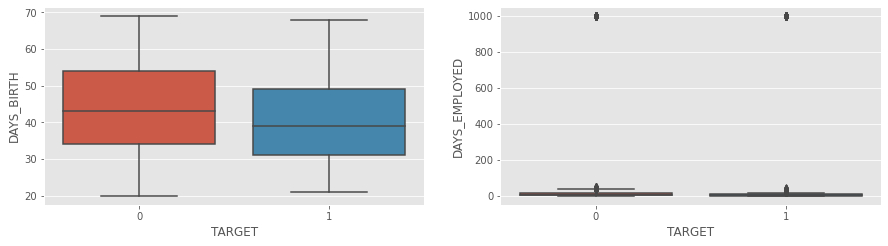

In [585]:
#Bivariate Analysis for CONTINUOUS VARIABLE (values can keep changing time to time) - will have outliers 

variables=["DAYS_BIRTH","DAYS_EMPLOYED"]
plt.figure(figsize=(15,20))
for i in enumerate(variables):
    plt.subplot(4,2,i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x="TARGET",y=i[1],data=df_app)


Inference - 

DAYS_BIRTH -The older age group seems to have fewer number of defaulters on a whole .
DAYS_EMPLOYED - This cannot be used to conclude if the person is a defaulter or not .

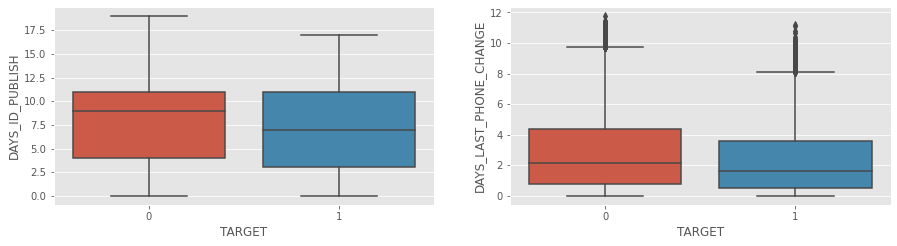

In [586]:
variable=["DAYS_ID_PUBLISH" , "DAYS_LAST_PHONE_CHANGE"]
plt.figure(figsize=(15,20))
for i in enumerate(variable):
    plt.subplot(4,2,i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x="TARGET",y=i[1],data=df_app)

Inference -
DAYS_ID_PUBLISH-How many days before the application did client change the identity document with which he applied for the loan . We can see that the defaulter changed his identity within fewer days before applying for the loan which is indicated by the median.

DAYS_LAST_PHONE_CHANGE-How many days before application did client change phone . In this case significant outliers are observed so we cant fully draw a conclusion . But from median we can observe the defaulter recently changed his phone number before application.


5. Analysis for DAYS_EMPLOYED

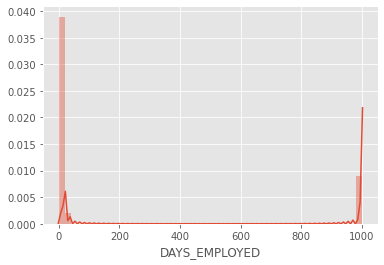

In [587]:
df_app.DAYS_EMPLOYED.value_counts(normalize=True)
sns.distplot(df_app.DAYS_EMPLOYED)
plt.show()


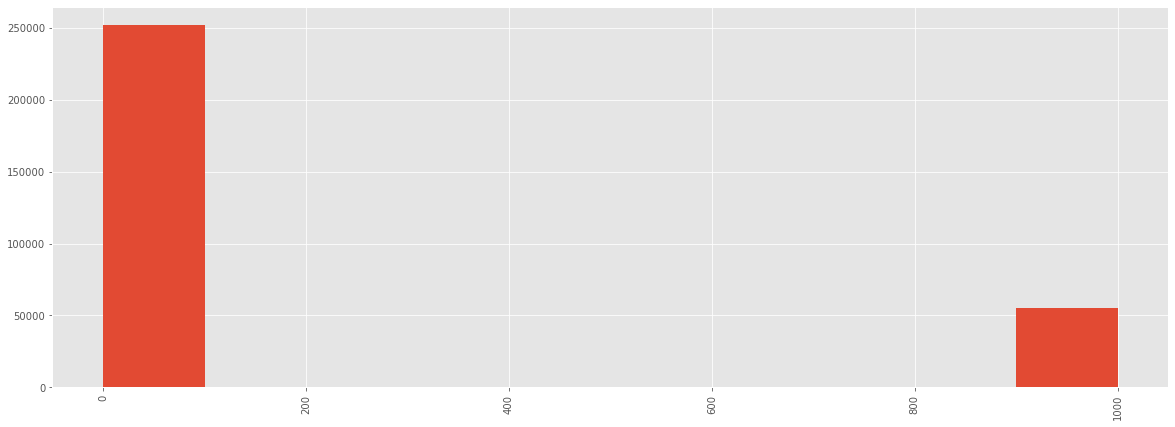

In [588]:
#DAYS_EMPLOYED
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize =(20, 7))
ax.hist(x="DAYS_EMPLOYED", data=df_app ,bins=10)
plt.rcParams["axes.titlesize"]=12
plt.xticks(rotation=90)
#plt.yscale('log')
plt.show()

#### Multivariate analysis-

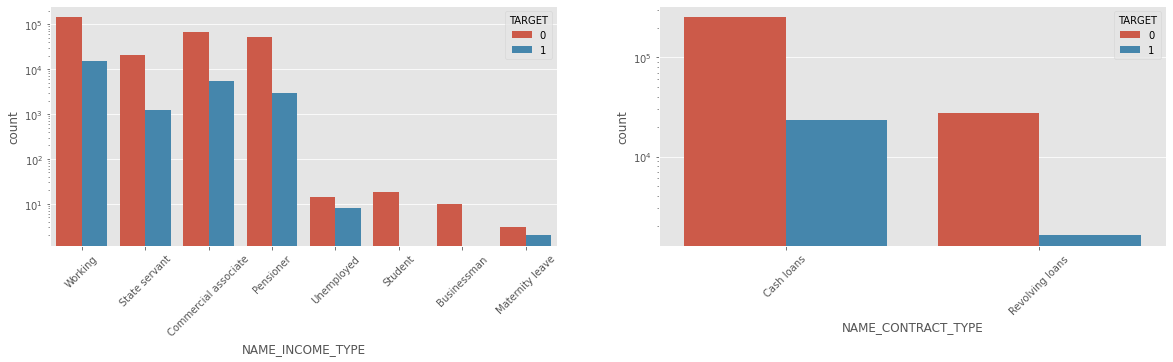

In [589]:
#Plotting with the target variable for better analysis
values=["NAME_INCOME_TYPE","NAME_CONTRACT_TYPE"]
plt.figure(figsize=(20,15))
for i in enumerate(values):
    plt.subplot(3,2,i[0]+1)
    plt.xticks(rotation=45)
    plt.yscale('log')
    sns.countplot(x=i[1],hue="TARGET",data=df_app)

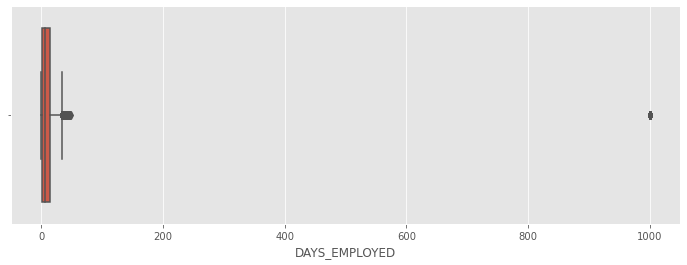

In [590]:
plt.figure(figsize=(12,4))
sns.boxplot(df_app["DAYS_EMPLOYED"])
plt.show()

target 1= Having payment difficulties 

Days_Birth:the Older people are having higher probabiltiy of repayment .

Some outliers are observed on DAYS_LST_PHONE_CHANGE in the dataset.


Histogram Analysis-

 for "DAYS_EMPLOYED" - DAYS_EMPLOYED(How many days before the application the person started current employment)

#### Univariate Categorical-Numeric Analysis

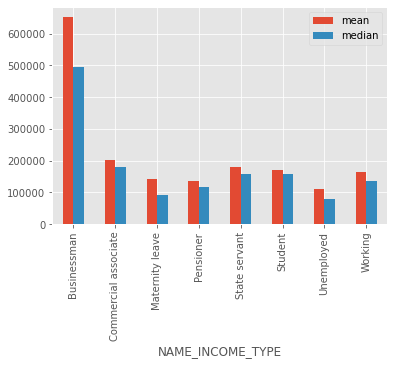

In [591]:
#Use aggregate function to display mean , median and quartile together 
df_app.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.bar()
plt.show()

Inference - The bank can target businessmen and commercial associates as it would be more lucrative and they would make returns on interest %.

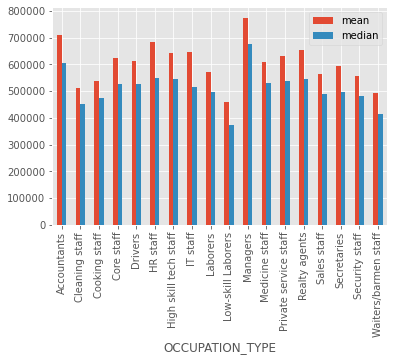

In [592]:
#Use aggregate function to display mean , median and quartile together 
df_app.groupby("OCCUPATION_TYPE")["AMT_CREDIT"].aggregate(["mean","median"]).plot.bar()

Inference - Managers ,accountants , high skill tech staff and realty agents have a great credit score and can be valuable clients to offer the services when compared to low skill labourers who may have difficulty to pay back the loan. 

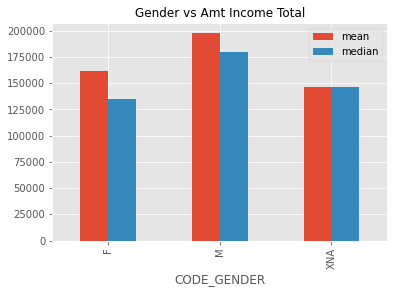

In [673]:
#amt_Credit score analysis -Credit amount of the loan was higher for males in comparison to others.
df_app.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.bar()
plt.title('Gender vs Amt Income Total')
plt.show()

inference - Men and Unknown seem to have a higher income total when compared to females.

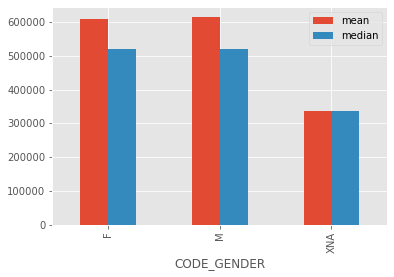

In [657]:
df_app.groupby("CODE_GENDER")["AMT_CREDIT"].aggregate(["mean","median"]).plot.bar()
plt.show()

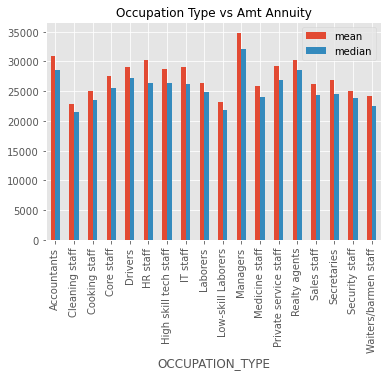

In [671]:
#Use aggregate function to display mean , median and quartile together 
df_app.groupby("OCCUPATION_TYPE")["AMT_ANNUITY"].aggregate(["mean","median"]).plot.bar()
plt.title('Occupation Type vs Amt Annuity')
plt.show()

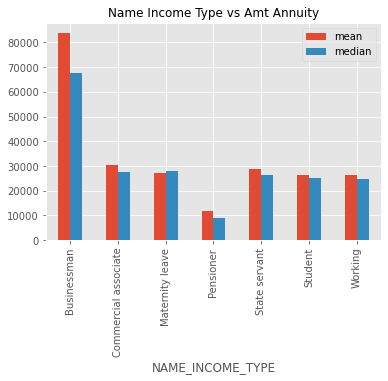

In [672]:
#Use aggregate function to display mean , median and quartile together 
df_app.groupby("NAME_INCOME_TYPE")["AMT_ANNUITY"].aggregate(["mean","median"]).plot.bar()
plt.title('Name Income Type vs Amt Annuity')
plt.show()

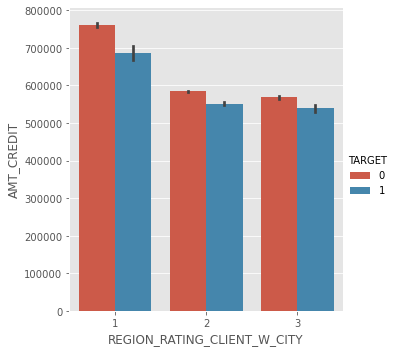

In [595]:
#REGION_RATING_CLIENT_W_CITY-Our rating of the region where client lives with taking city into account (1,2,3)
sns.catplot(x="REGION_RATING_CLIENT_W_CITY",y="AMT_CREDIT",hue="TARGET",kind="bar", data=df_app)

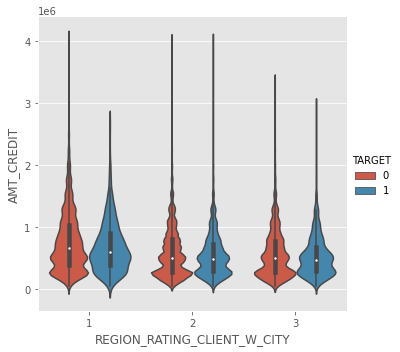

In [596]:
sns.catplot(x="REGION_RATING_CLIENT_W_CITY", y="AMT_CREDIT", hue="TARGET",
            kind="violin", data=df_app)

Inference - Based on the region the client lives they have a credit rating of 1,2,3 which is shown in the plots that the clients with credit 1 are higher at defaulting as well as bringing in business.

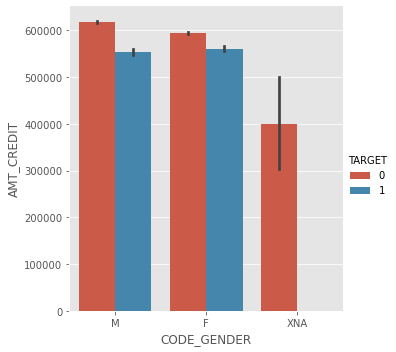

In [597]:
sns.catplot(x="CODE_GENDER", y="AMT_CREDIT",hue="TARGET",kind="bar", data=df_app)
plt.show()

Inference - THe male gender has a higher number of people with good credit score , Female gender seems to have a higher number of defaulters

In [598]:
#Categorical-categorical plotting 

Text(0.5, 1.0, 'Amt Income vs Amt Goods Price')

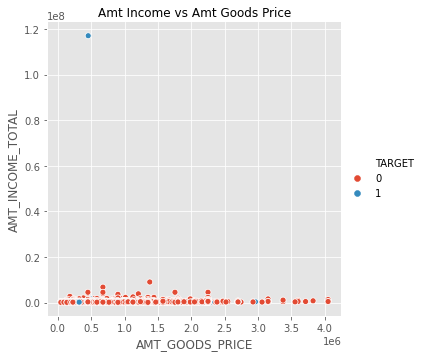

In [674]:
#Scatterplot- Numerical-Numerical
sns.relplot(x="AMT_GOODS_PRICE", y="AMT_INCOME_TOTAL", hue="TARGET", data=df_app)
plt.title('Amt Income vs Amt Goods Price')

Inference - Based on the income and the Amount of Goods price  given to get the loan we cannot accurately see too many defaulters.

Text(0.5, 1.0, 'Amt Income vs Amt Goods Price')

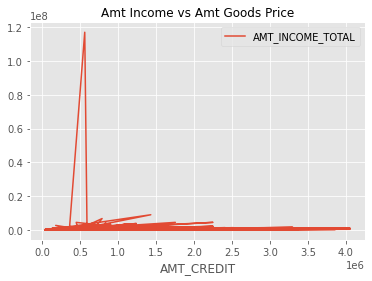

In [675]:
lines=df_app.plot.line(x='AMT_CREDIT',y='AMT_INCOME_TOTAL')
plt.title('Amt Income vs Amt Goods Price')

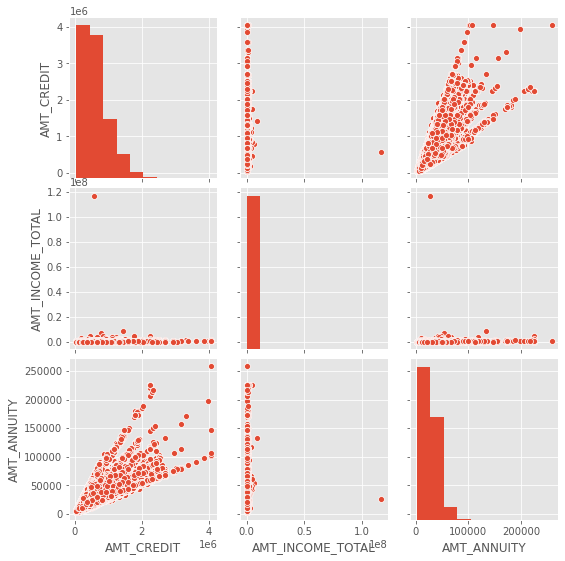

In [661]:
sns.pairplot(df_app[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY']])
plt.show()

#### Null Value Treatment

In [600]:
#Null value treatment for better analysis
df_app.isnull().sum()
df_app[df_app['NAME_FAMILY_STATUS'].isnull()]
df_app=df_app[~(df_app['NAME_FAMILY_STATUS'].isnull())]

In [601]:
#Null value treatment for better analysis
df_app.isnull().sum()
df_app[df_app['OCCUPATION_TYPE'].isnull()]
df_app=df_app[~(df_app['OCCUPATION_TYPE'].isnull())]

In [602]:
#Null value treatment for better analysis
df_app.isnull().sum()
df_app[df_app['NAME_EDUCATION_TYPE'].isnull()]
df_app=df_app[~(df_app['NAME_EDUCATION_TYPE'].isnull())]

In [603]:
#Null value treatment for better analysis
df_app.isnull().sum()
df_app[df_app['CNT_CHILDREN'].isnull()]
df_app=df_app[~(df_app['CNT_CHILDREN'].isnull())]

#### Heatmaps and Multivariate analysis-

In [604]:
#Analysis of the credit score of the various occupation type FAMILY_STATUS 
res=pd.pivot_table(data=df_app,index="OCCUPATION_TYPE",columns="NAME_FAMILY_STATUS",values="AMT_INCOME_TOTAL")
res

NAME_FAMILY_STATUS     Civil marriage        Married      Separated  \
OCCUPATION_TYPE                                                       
Accountants             202267.569179  189096.423263  215490.404241   
Cleaning staff          129585.996269  127840.044260  135301.348315   
Cooking staff           138291.036119  137143.934014  141755.051683   
Core staff              171224.437277  171464.148659  180835.066364   
Drivers                 183635.793717  189728.906100  179684.966952   
HR staff                191325.784091  190841.603306  189802.173913   
High skill tech staff   177547.112069  184119.135034  183791.235020   
IT staff                242014.285714  210702.740066  181446.428571   
Laborers                160996.697836  169658.376792  162827.906772   
Low-skill Laborers      128775.186930  137542.287841  122637.362637   
Managers                259398.617442  260804.468694  262436.350781   
Medicine staff          158025.260095  146422.195133  159682.608926   
Private service staff   190102.649007  179976.143141  201109.110902   
Realty agents           207968.354430  193177.863436  186230.769231   
Sales staff             155269.599574  150906.069003  156117.033566   
Secretaries             154837.206522  159992.103203  167512.500000   
Security staff          143345.509383  151390.619626  157209.417040   
Waiters/barmen staff    151160.303571  140176.033691  148632.750000   

NAME_FAMILY_STATUS     Single / not married          Widow  
OCCUPATION_TYPE                                             
Accountants                   200971.430162  206832.421233  
Cleaning staff                133784.978873  140565.127803  
Cooking staff                 142603.405806  137538.063380  
Core staff                    175808.691572  169185.849145  
Drivers                       176175.169440  181501.581081  
HR staff                      177601.150000  197551.350000  
High skill tech staff         181915.574468  171250.778810  
IT staff                      217933.860000  178875.000000  
Laborers                      159225.203783  153256.885820  
Low-skill Laborers            126428.512500  141750.000000  
Managers                      261412.132409  235887.403247  
Medicine staff                150207.835393  159050.873494  
Private service staff         176346.034816  170534.482759  
Realty agents                 198875.838926  176426.470588  
Sales staff                   153061.584259  154454.673077  
Secretaries                   163787.346330  159975.000000  
Security staff                146424.173870  134357.837838  
Waiters/barmen staff          146978.987395  142435.714286

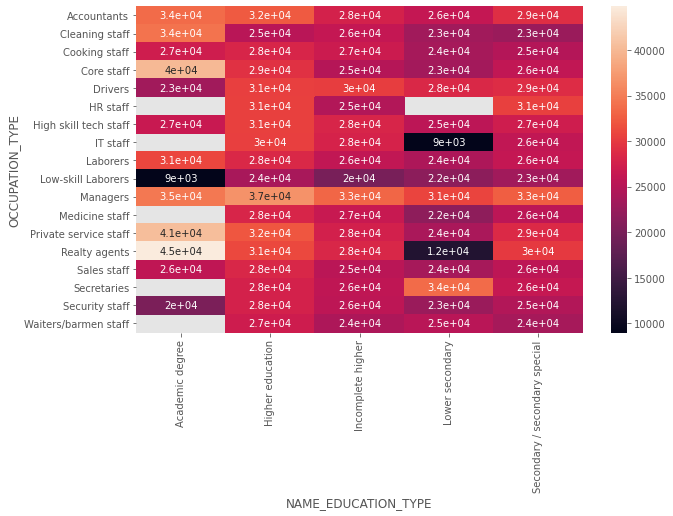

In [679]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(res,annot=True,ax=ax)

Inference - From the above heatmap we can conclude that Managers irrespective of their family status earn a highest AMT_INCOME_TOTAL, a few IT staff also can be target for the loan in future .The waiters security staff are less likely to be targeted.

In [680]:
#Analysis of the credit score of the various occupation type FAMILY_STATUS 
res1=pd.pivot_table(data=df_app,index="OCCUPATION_TYPE",columns="NAME_FAMILY_STATUS",values="AMT_CREDIT")
res1

NAME_EDUCATION_TYPE    Academic degree  Higher education  Incomplete higher  \
OCCUPATION_TYPE                                                               
Accountants               33669.000000      32434.051242       27770.015730   
Cleaning staff            34258.500000      25295.328000       26251.530612   
Cooking staff             27292.500000      28280.487119       26964.076271   
Core staff                40054.860000      29351.828726       25065.752046   
Drivers                   23350.500000      30506.275256       30318.937882   
HR staff                           NaN      30614.142857       24685.375000   
High skill tech staff     26649.000000      30564.798496       28240.636130   
IT staff                           NaN      30409.297654       27980.134615   
Laborers                  31017.000000      28431.250380       25991.183365   
Low-skill Laborers         9000.000000      23944.777778       19909.200000   
Managers                  34660.216216      36674.609053       33275.320086   
Medicine staff                     NaN      28257.418919       26522.136986   
Private service staff     40551.750000      32073.997110       27611.368421   
Realty agents             44775.000000      31206.786344       28391.744681   
Sales staff               25772.500000      28376.165708       25385.775204   
Secretaries                        NaN      27726.932432       25783.078125   
Security staff            20250.000000      27789.437195       25726.269231   
Waiters/barmen staff               NaN      27077.907821       24301.867021   

NAME_EDUCATION_TYPE    Lower secondary  Secondary / secondary special  
OCCUPATION_TYPE                                                        
Accountants               26204.000000                   29032.323928  
Cleaning staff            23325.541667                   22705.921654  
Cooking staff             23732.648438                   24801.052858  
Core staff                23487.731707                   25972.827217  
Drivers                   28450.463855                   28857.999273  
HR staff                           NaN                   30589.385294  
High skill tech staff     25499.758065                   27244.995742  
IT staff                   9000.000000                   25996.295455  
Laborers                  24333.179012                   26205.890549  
Low-skill Laborers        21678.798913                   23341.335627  
Managers                  30827.571429                   32698.482874  
Medicine staff            21805.772727                   25576.701189  
Private service staff     23966.181818                   28645.707876  
Realty agents             12280.500000                   29987.401899  
Sales staff               23755.203947                   25693.726918  
Secretaries               33691.500000                   26376.404564  
Security staff            22812.634021                   24693.578947  
Waiters/barmen staff      25270.411765                   23759.123819

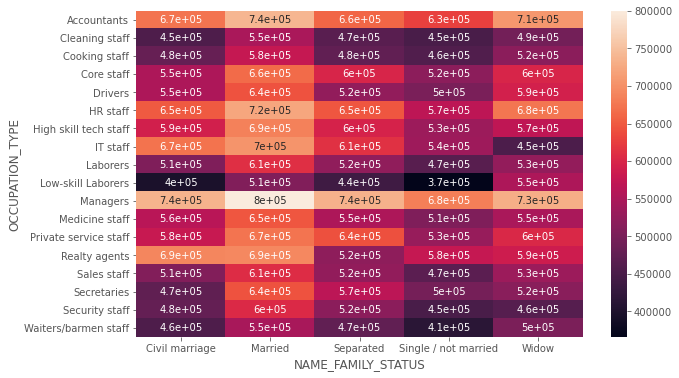

In [681]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(res1,annot=True,ax=ax)

In [683]:
#Analysis of the -AMT_ANNUITY EMI applied of the various occupation type and Education Type 
res2=pd.pivot_table(data=df_app,index="OCCUPATION_TYPE",columns="NAME_EDUCATION_TYPE",values="AMT_ANNUITY")
res2

NAME_EDUCATION_TYPE    Academic degree  Higher education  Incomplete higher  \
OCCUPATION_TYPE                                                               
Accountants               33669.000000      32434.051242       27770.015730   
Cleaning staff            34258.500000      25295.328000       26251.530612   
Cooking staff             27292.500000      28280.487119       26964.076271   
Core staff                40054.860000      29351.828726       25065.752046   
Drivers                   23350.500000      30506.275256       30318.937882   
HR staff                           NaN      30614.142857       24685.375000   
High skill tech staff     26649.000000      30564.798496       28240.636130   
IT staff                           NaN      30409.297654       27980.134615   
Laborers                  31017.000000      28431.250380       25991.183365   
Low-skill Laborers         9000.000000      23944.777778       19909.200000   
Managers                  34660.216216      36674.609053       33275.320086   
Medicine staff                     NaN      28257.418919       26522.136986   
Private service staff     40551.750000      32073.997110       27611.368421   
Realty agents             44775.000000      31206.786344       28391.744681   
Sales staff               25772.500000      28376.165708       25385.775204   
Secretaries                        NaN      27726.932432       25783.078125   
Security staff            20250.000000      27789.437195       25726.269231   
Waiters/barmen staff               NaN      27077.907821       24301.867021   

NAME_EDUCATION_TYPE    Lower secondary  Secondary / secondary special  
OCCUPATION_TYPE                                                        
Accountants               26204.000000                   29032.323928  
Cleaning staff            23325.541667                   22705.921654  
Cooking staff             23732.648438                   24801.052858  
Core staff                23487.731707                   25972.827217  
Drivers                   28450.463855                   28857.999273  
HR staff                           NaN                   30589.385294  
High skill tech staff     25499.758065                   27244.995742  
IT staff                   9000.000000                   25996.295455  
Laborers                  24333.179012                   26205.890549  
Low-skill Laborers        21678.798913                   23341.335627  
Managers                  30827.571429                   32698.482874  
Medicine staff            21805.772727                   25576.701189  
Private service staff     23966.181818                   28645.707876  
Realty agents             12280.500000                   29987.401899  
Sales staff               23755.203947                   25693.726918  
Secretaries               33691.500000                   26376.404564  
Security staff            22812.634021                   24693.578947  
Waiters/barmen staff      25270.411765                   23759.123819

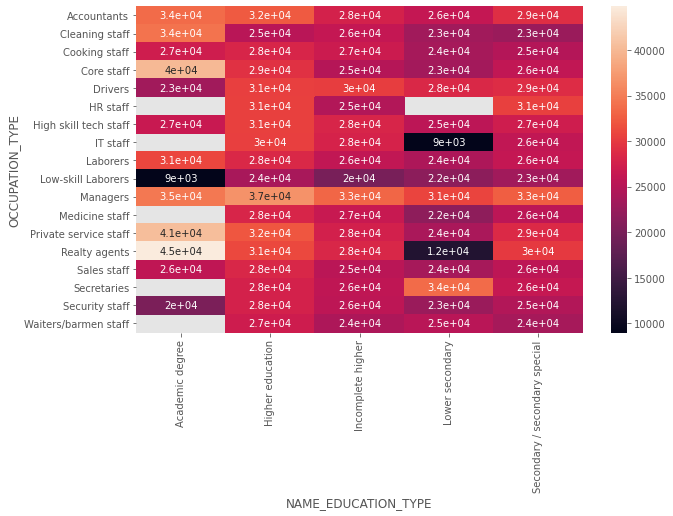

In [684]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(res2,annot=True,ax=ax)

Inference- People who have lower secondary Education such as low skilled labourers are less likely to take Emis and use the AMT_ANNUITY , whereas it observed that Private service staff and core staff are more likely to use this facility.


#### Correlation heatmap-

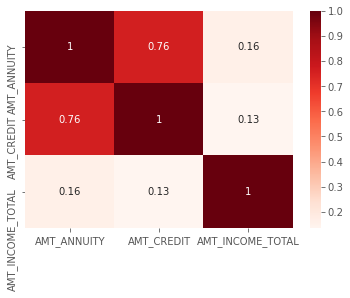

In [610]:
sns.heatmap(df_app[["AMT_ANNUITY","AMT_CREDIT","AMT_INCOME_TOTAL"]].corr(),annot=True,cmap="Reds")

Inference - AMT_ANNUITY has a good correlation with the AMT_CREDIT as emis can be taken easily by a person who has a good credit score ,on the other hand it is difficult to get emis with a low salary.The credit score is not completely dependent on income total as observed.

##  MERGING WITH THE APPLICATION DATA AND READING THE PREVIOUS APPLICATION DATA

#### Loading Dataframe

In [611]:
df_prevapp=pd.read_csv("previous_application.csv")
df_prevapp.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [612]:
#df_app.to_csv(r'D:\pre.csv',index=False,header=True)

### Check Schema 

In [613]:
df_prevapp.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [614]:
df_prevapp.shape

(1670214, 37)

In [615]:
df_app.shape

(211118, 39)

In [616]:
df_prevapp.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [617]:
new_df=pd.merge(left=df_app,right=df_prevapp,how="inner",on="SK_ID_CURR",suffixes="_y")

In [618]:
new_df.shape

(956121, 75)

In [619]:
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1          Cash loans           M             0   
1      100003       0          Cash loans           F             0   
2      100003       0          Cash loans           F             0   
3      100003       0          Cash loans           F             0   
4      100004       0     Revolving loans           M             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0                1             0          202500.0     406597.5       24700.5   
1                0             0          270000.0    1293502.5       35698.5   
2                0             0          270000.0    1293502.5       35698.5   
3                0             0          270000.0    1293502.5       35698.5   
4                1             0           67500.0     135000.0        6750.0   

   AMT_GOODS_PRICE_ NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0          Working  Secondary / secondary special   
1         1129500.0    State servant               Higher education   
2         1129500.0    State servant               Higher education   
3         1129500.0    State servant               Higher education   
4          135000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment          25              1   
1               Married  House / apartment          45              3   
2               Married  House / apartment          45              3   
3               Married  House / apartment          45              3   
4  Single / not married  House / apartment          52              0   

   DAYS_ID_PUBLISH  ... CODE_REJECT_REASON  NAME_TYPE_SUITE  NAME_CLIENT_TYPE  \
0                5  ...                XAP              NaN               New   
1                0  ...                XAP    Unaccompanied          Repeater   
2                0  ...                XAP           Family         Refreshed   
3                0  ...                XAP           Family         Refreshed   
4                6  ...                XAP    Unaccompanied               New   

    NAME_GOODS_CATEGORY  NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0              Vehicles             POS                XNA   
1                   XNA            Cash             x-sell   
2             Furniture             POS                XNA   
3  Consumer Electronics             POS                XNA   
4                Mobile             POS                XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
0                    Stone               500       Auto technology   
1  Credit and cash offices                -1                   XNA   
2                    Stone              1400             Furniture   
3             Country-wide               200  Consumer electronics   
4         Regional / Local                30          Connectivity   

   CNT_PAYMENT  NAME_YIELD_GROUP          PRODUCT_COMBINATION  \
0         24.0        low_normal      POS other with interest   
1         12.0        low_normal             Cash X-Sell: low   
2          6.0            middle   POS industry with interest   
3         12.0            middle  POS household with interest   
4          4.0            middle  POS mobile without interest   

   DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0            365243.0          -565.0                      125.0   
1            365243.0          -716.0                     -386.0   
2            365243.0          -797.0                     -647.0   
3            365243.0         -2310.0                    -1980.0   
4            365243.0          -784.0                     -694.0   

   DAYS_LAST_DUE DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0          -25.0            -17.0                       0.0  
1         -536.0  

In [620]:
#To display all columns 
pd.set_option('display.max_columns', 37)
df_prevapp

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   

In [621]:
df_prevapp["NAME_CONTRACT_STATUS"]

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object

In [622]:
#df_prevapp.to_csv(r'D:\prevapp1.csv',index=False,header=True)

##  Numeric-Numeric analysis
#### Univariate Analysis
- Joint plot and Scatter plot Analysis.
#### 1. Amount_down_payment Vs Amount_application


In [623]:
df_prevapp['AMT_DOWN_PAYMENT'].dtype
df_prevapp['AMT_APPLICATION'].dtype

dtype('float64')

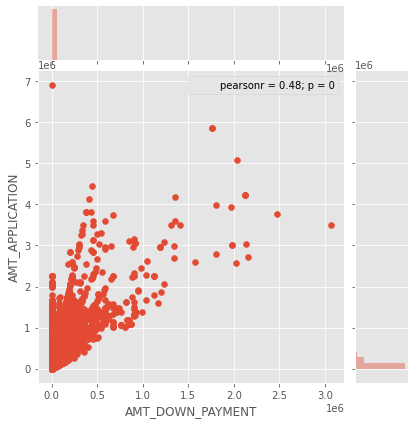

In [624]:
import scipy.stats as stats
sns.jointplot(df_prevapp.AMT_DOWN_PAYMENT,df_prevapp.AMT_APPLICATION,stat_func=stats.pearsonr)
plt.show()

Conclusion -
Amount_application - For how much credit did client ask on the previous application. 

Amount_Down_payment- Down payment on the previous application

This plot shows low degree  of correlation and type is positive,when downpayment was less the amount_application was more.The relation is strong than with amount_credit

#### 2. Amount_down_payment Vs Amount_credit

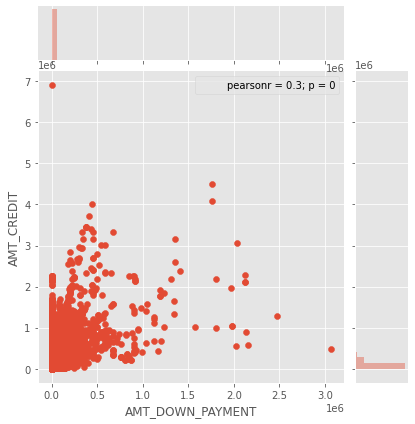

In [625]:
import scipy.stats as stats
sns.jointplot(df_prevapp.AMT_DOWN_PAYMENT,df_prevapp.AMT_CREDIT,stat_func=stats.pearsonr)
plt.show()

Conclusion - 

Amount_Down_payment- Down payment on the previous application

Amount_Credit-Final credit amount on the previous application.

The p-value is 0, which means we can safely assume that  our evidence of the relationship between the variables is very strong.

#### Multiplots for loan approval
Taking the values of NAME_CONTRACT_STATUS as target variables and plotting results .

In [626]:
new_df["NAME_CONTRACT_STATUS"].value_counts()

Approved        600580
Canceled        169095
Refused         168874
Unused offer     17572
Name: NAME_CONTRACT_STATUS, dtype: int64

In [627]:
new_df["NAME_CONTRACT_STATUS"].value_counts()*100/len(new_df)

Approved        62.814225
Canceled        17.685523
Refused         17.662409
Unused offer     1.837843
Name: NAME_CONTRACT_STATUS, dtype: float64

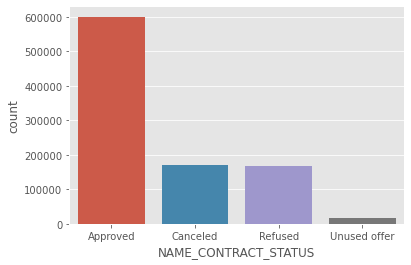

In [628]:
sns.countplot(new_df["NAME_CONTRACT_STATUS"])
plt.show()

#### Handling Null Values more than 50%

In [629]:
def null_calculation(df):
    out=round(df.isnull().sum()/len(df.index)*100,2)
    return out

In [630]:
Null_col=null_calculation(df_prevapp)
Null_col.head()


SK_ID_PREV             0.00
SK_ID_CURR             0.00
NAME_CONTRACT_TYPE     0.00
AMT_ANNUITY           22.29
AMT_APPLICATION        0.00
dtype: float64

In [631]:
Null_col_50p=Null_col[Null_col>50]
print(Null_col_50p)

AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64


In [632]:
new_df=new_df.drop(Null_col_50p.index,axis=1)
new_df.shape

(956121, 71)

In [633]:
new_df['NAME_CONTRACT_TYPEy']

0          Consumer loans
1              Cash loans
2          Consumer loans
3          Consumer loans
4          Consumer loans
               ...       
956116         Cash loans
956117    Revolving loans
956118         Cash loans
956119         Cash loans
956120     Consumer loans
Name: NAME_CONTRACT_TYPEy, Length: 956121, dtype: object

In [634]:
new_df["NAME_CONTRACT_TYPEy"].value_counts()

Consumer loans     443324
Cash loans         396296
Revolving loans    116253
XNA                   248
Name: NAME_CONTRACT_TYPEy, dtype: int64

In [635]:
approved_df=new_df[new_df["NAME_CONTRACT_STATUS"]=="Approved"]
refused_df=new_df[new_df["NAME_CONTRACT_STATUS"]=="Refused"]
canceled_df=new_df[new_df["NAME_CONTRACT_STATUS"]=="Canceled"]
unused_df=new_df[new_df["NAME_CONTRACT_STATUS"]=="Unused offer"]

## Numeric -Categorical Variable analysis

#### 1. Analysis of  amount credit
Check -
On basis of their amount credit status they were approved ,refused ,canceled loan .

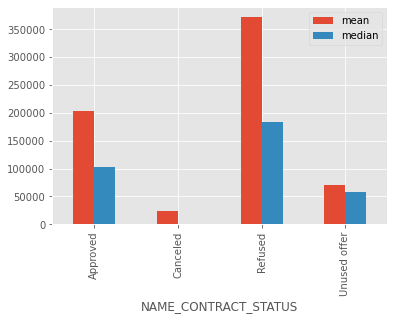

In [636]:
df_prevapp.groupby("NAME_CONTRACT_STATUS")['AMT_CREDIT'].aggregate(["mean","median"]).plot.bar()

Inference - On the basis of data and AMT_CREDIT we found that many loans were refused than approved and fair share were unused.

#### 2. Analysis of  amount annuity 
Check -
Annuity of previous application -An annuity is a contract between person and an insurance company of a series of payments .


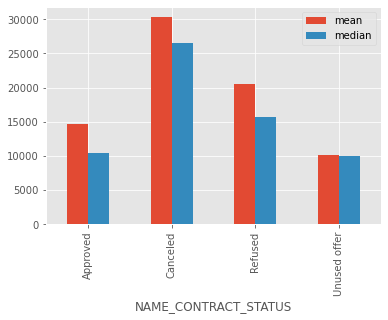

In [637]:
df_prevapp.groupby("NAME_CONTRACT_STATUS")['AMT_ANNUITY'].aggregate(["mean","median"]).plot.bar()

Inference - In the case of AMT_ANNUITY most of the loans were canceled or refused more than approved .

#### Multi-variate and Bivariate analysis-

#### 1. Analysis of Name Contract type

 Check -
 Whether it is consumer loan ,cash loan and Revolving loan and whether they are approved ,Refused , Cancelled and Unused.
 

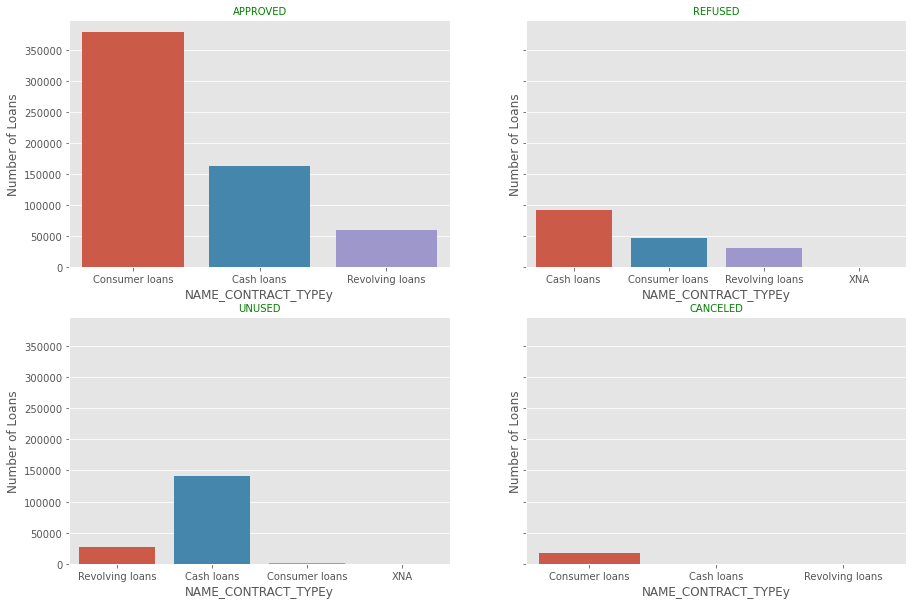

In [638]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,10),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x="NAME_CONTRACT_TYPEy")
ax1.set_title("APPROVED",fontsize=10,color='green')
ax1.set_xlabel("NAME_CONTRACT_TYPEy")
ax1.set_ylabel("Number of Loans")

ax2=sns.countplot(ax=ax2,data=refused_df,x="NAME_CONTRACT_TYPEy")
ax2.set_title("REFUSED",fontsize=10,color='green')
ax2.set_xlabel("NAME_CONTRACT_TYPEy")
ax2.set_ylabel("Number of Loans")

ax3=sns.countplot(ax=ax3,data=canceled_df,x="NAME_CONTRACT_TYPEy")
ax3.set_title("UNUSED",fontsize=10,color='green')
ax3.set_xlabel("NAME_CONTRACT_TYPEy")
ax3.set_ylabel("Number of Loans")

ax4=sns.countplot(ax=ax4,data=unused_df,x="NAME_CONTRACT_TYPEy")
ax4.set_title("CANCELED",fontsize=10,color='green')
ax4.set_xlabel("NAME_CONTRACT_TYPEy")
ax4.set_ylabel("Number of Loans")
plt.show()

#### Conclusion -more number of Consumer loans are approved , cash loans are refused ,a few consumer loans were canceled and fewer revolving loans were approved .

#### 2. Analysis of Occupation type

Check - Which occupation Type had taken more number of loans, who was approved of the loan,whose loan was canceled and whose loan was refused. 

In [639]:
def multiplot(variable_name):
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,12),sharey=True)
    fig.tight_layout(pad=10.0)
    
    ax1=sns.countplot(ax=ax1,data=approved_df,x=variable_name)
    ax1.set_title("REFUSED",fontsize=11,color='green')
    ax1.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax1.set_ylabel("Number of Loans")

    ax2=sns.countplot(ax=ax2,data=refused_df,x=variable_name)
    ax2.set_title("APPROVED",fontsize=11,color='green')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax2.set_ylabel("Number of Loans")

    ax3=sns.countplot(ax=ax3,data=canceled_df,x=variable_name)
    ax3.set_title("CANCELED",fontsize=11,color='green')
    ax3.set_xlabel(variable_name)
    ax3.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax3.set_ylabel("Number of Loans")

    ax4=sns.countplot(ax=ax4,data=unused_df,x=variable_name)
    ax4.set_title("UNUSED",fontsize=11,color='green')
    ax4.set_xlabel(variable_name)
    ax4.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax4.set_ylabel("Number of Loans")
    plt.show()

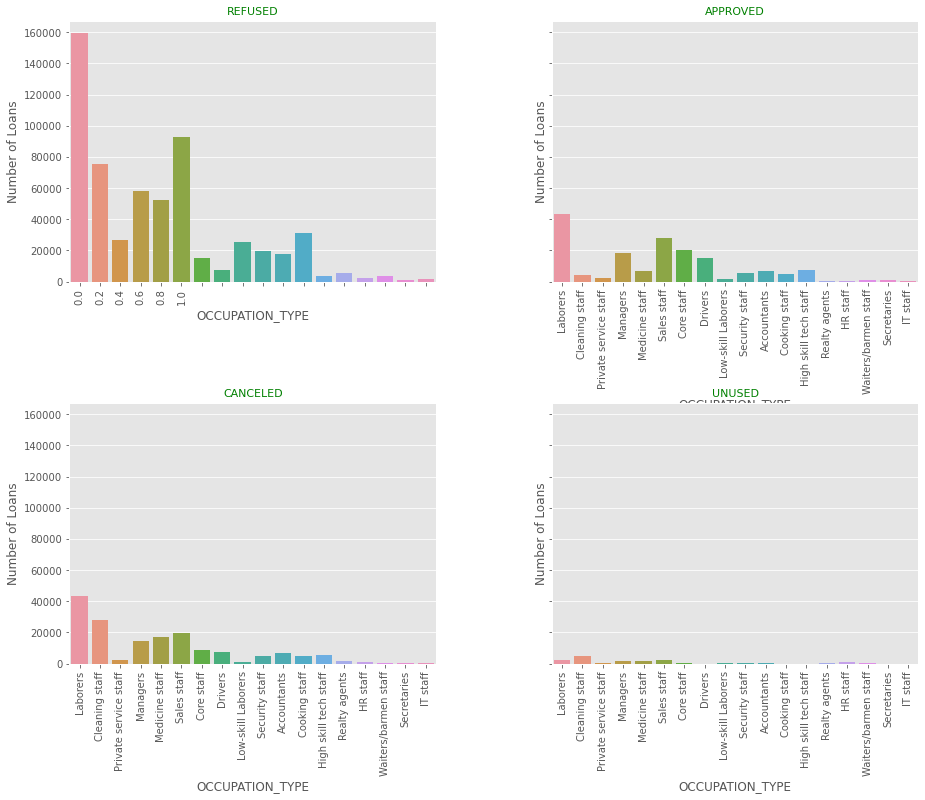

In [640]:
multiplot("OCCUPATION_TYPE")

#### Conclusion - The Labourers and sales staff were most approved as well as most refused loans , core staff and drivers were approved more loans than refused .

#### 3. Analysis of Name Contract type

Check - Which gender Type had taken more number of loans, who was approved of the loan,whose loan was canceled and whose loan was refused.

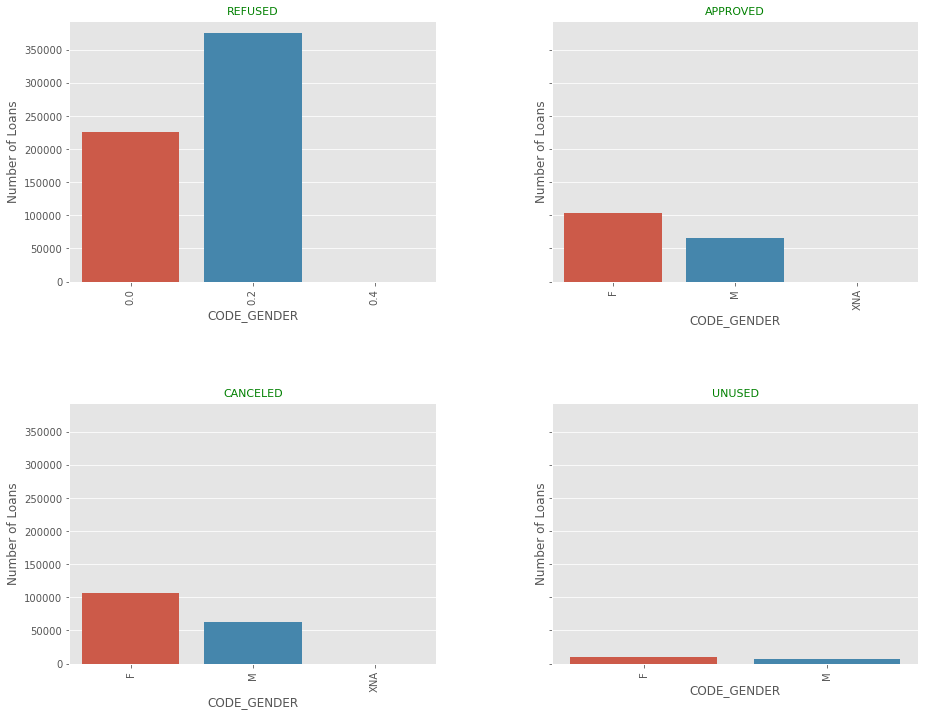

In [641]:
multiplot('CODE_GENDER')

#### Conlusion - Males were more refused loans , females were more approved as well as cancelled loans .

#### 4. Analysis of Name Client type

 Check-whether client  is Repeater ,New and Refresed client and whether they are approved ,Refused , Cancelled and unused.

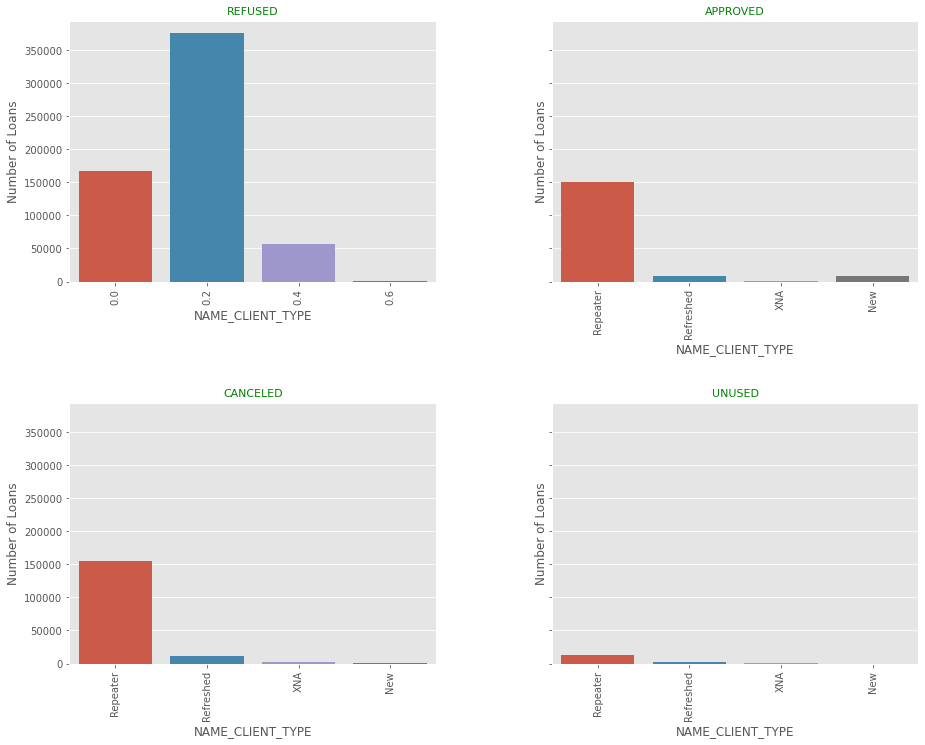

In [642]:
multiplot('NAME_CLIENT_TYPE')

#### Conclusion -We can see that Refreshed clients loan requests are not getting refused ,Repeaters loan requests are getting refused , approved as well as cancelled .There are very few new clients loans approved .

#### 5. Analysis of Name Payment type

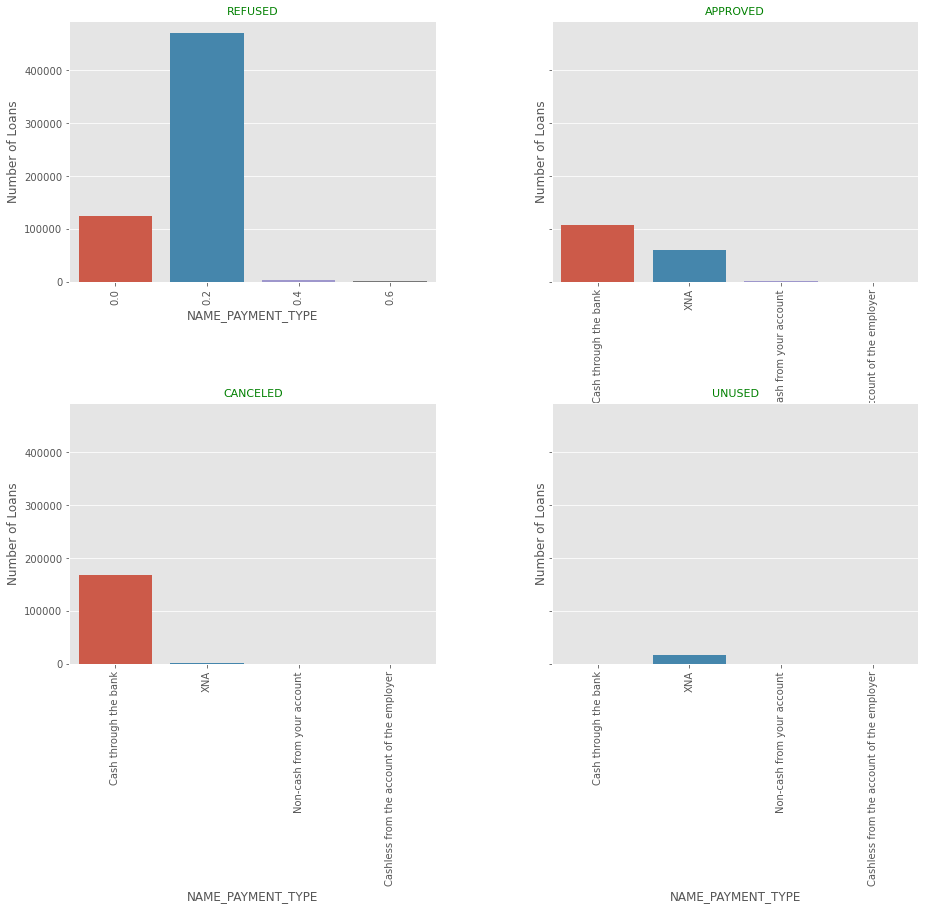

In [643]:
multiplot('NAME_PAYMENT_TYPE')

#### Conclusion- When payment source was through bank the loan was most accepted and it was refused most when the payment type was unknown.

#### 6. Analysis of Name Family type

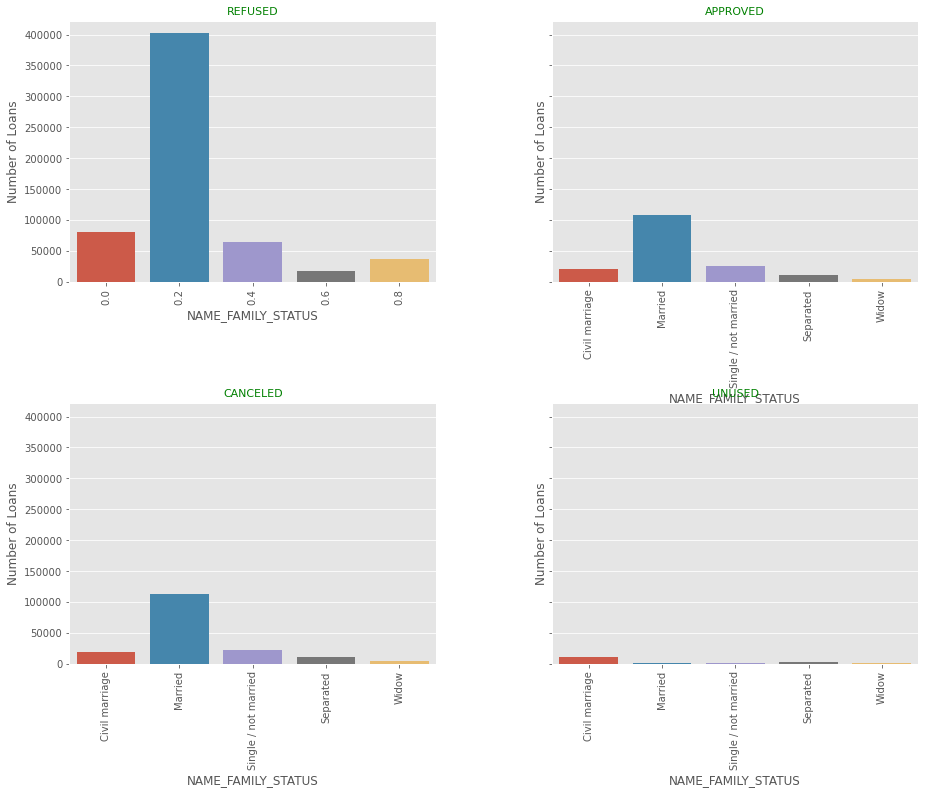

In [644]:
multiplot("NAME_FAMILY_STATUS")

#### Conclusion - Married people and civil marriage were more refused loans ,single and married had most number of approved loans .

#### 6. Analysis of Product Combination type

Check -Detailed product combination of the previous application and whether they are approved ,Refused , Cancelled and unused.

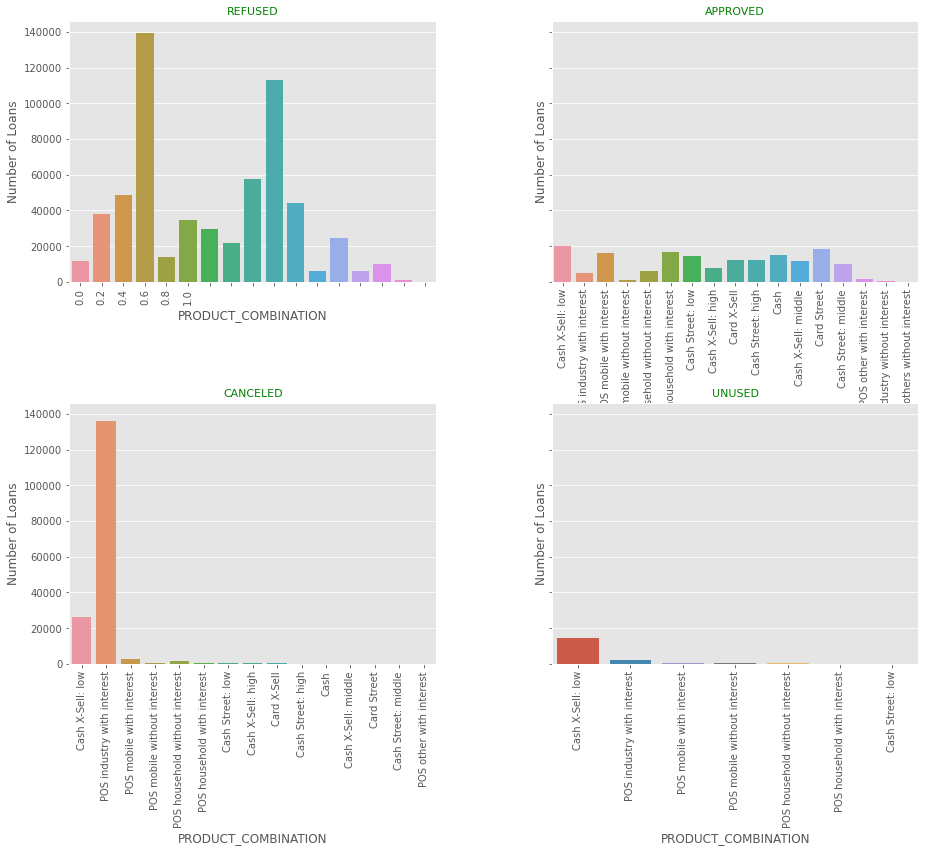

In [645]:
multiplot("PRODUCT_COMBINATION")

#### Conclusion -the most accepted loan is  CASH X SELL.LOW and most cancelled loan is CASH and most unused loan is  POS MOBILE WITH INTEREST.


#### 6. Analysis of Name Goods Category type

check -What kind of goods did the client apply for in the previous application

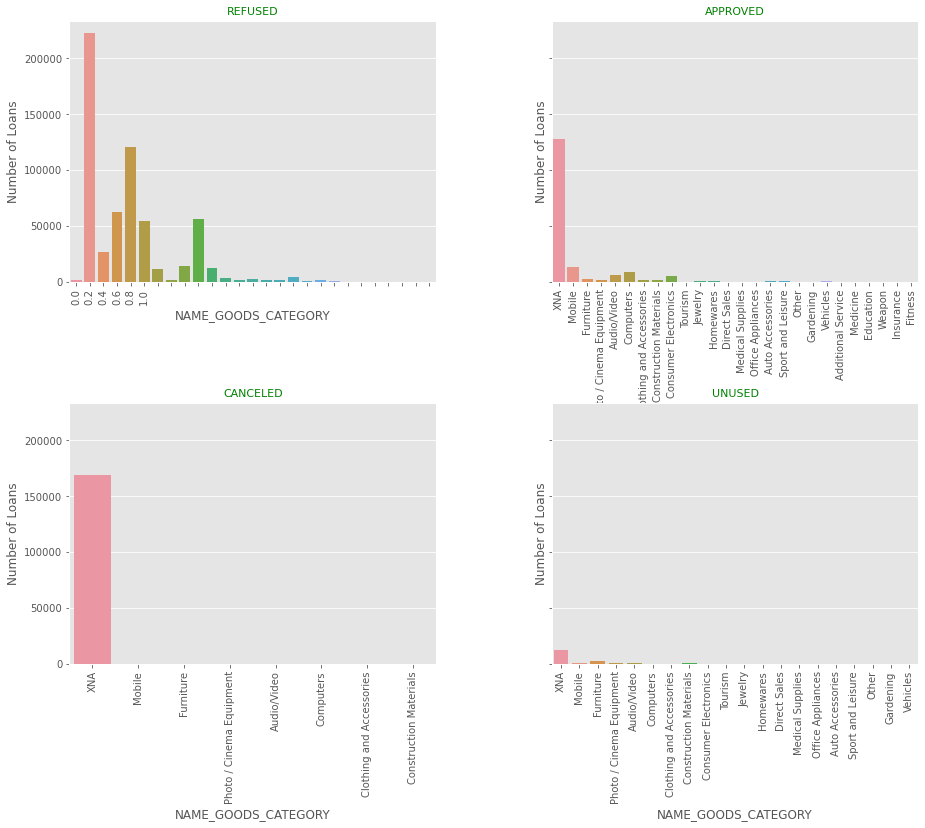

In [646]:
multiplot('NAME_GOODS_CATEGORY')

#### Conclusion - Computers, Audio/Video devices and XNA(unknown) devices were more applied for loans to be approved but were more refused by bank.

In [647]:
#### Micro Finance Loan vs cash loan purpose
#Did the client requested insurance during the previous application-NFLAG_INSURED_ON_APPROVAL

## Categorical Analysis

####   Univariate Analysis
Analysis of NAME_PORTFOLIO -
Check if client requested insurance for name_portfolio.

In [648]:
df_prevapp.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

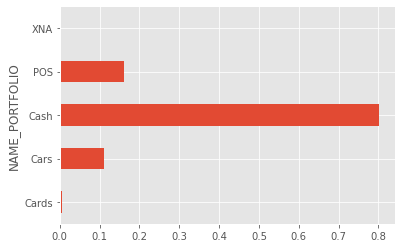

In [649]:
df_prevapp.groupby(['NAME_PORTFOLIO'])['NFLAG_INSURED_ON_APPROVAL'].mean().plot.barh()

Inference-
Cash portfolio was the highest .
NAME_PORTFOLIO-Was the previous application for CASH, POS, CAR, …

NFLAG_INSURED_ON_APPROVAL-Did the client requested insurance during the previous application


Analysis of NAME_PRODUCT_TYPE -

Check if client requested insurance for product_type

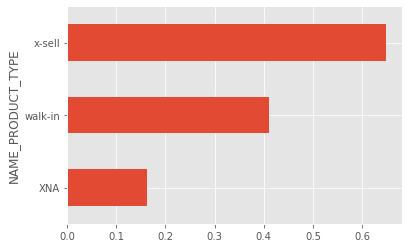

In [650]:
#NAME_PRODUCT_TYPE-Was the previous application x-sell o walk-in
#NFLAG_INSURED_ON_APPROVAL-Did the client requested insurance during the previous application
df_prevapp.groupby(['NAME_PRODUCT_TYPE'])['NFLAG_INSURED_ON_APPROVAL'].mean().plot.barh()

Inference - X-sell is the producr type thst most requested for insurance .

Analysis of NAME_PORTFOLIO 

Based on portfolio type -Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Analysis of which means they used to pay for .

In [651]:
df_prevapp['FLAG_LAST_APPL_PER_CONTRACT']=np.where(df_prevapp.NFLAG_LAST_APPL_IN_DAY
=='yes',1,0)

df_prevapp.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

0    1670214
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [652]:
df_prevapp.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

Inference -
POS and CASH were the best methods preferred .

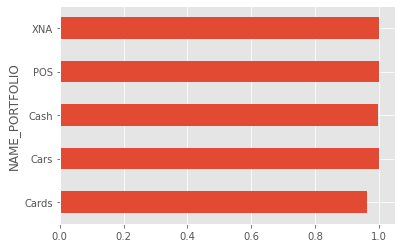

In [653]:
df_prevapp.groupby(['NAME_PORTFOLIO'])['NFLAG_LAST_APPL_IN_DAY'].mean().plot.barh()
plt.show()

#### CONCLUSION-

-Banks should focus more on contract type -'Student','Pensioner' and 'Businessman' with housing type . Other than Corporate for successful payment .

-It should target those with a good credit score as they are less likely to default .

-Banks should focus less on Income Type -Working individuals as they are having most number of unsuccessful payments.

-Also Loan purpose should be checked well , what EMI is being requested for should be checked before approval. Like in the case 'Repair' is having higher unsuccessful payment.

